In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
import torch as torch
import wandb
from modular_transformers.straightening.straightening_utils import compute_model_activations, compute_model_curvature


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
path = "/om2/user/jackking/modular_transformers/scripts/input_statistics/data"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/om2/user/jackking/anaconda/envs/modular_transformers/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### experiment 1

In [2]:
dataype = "experiment_1"

val_data_A = pickle.load(open(f"{path}/{dataype}/valid_data_A.pkl", "rb"))
ctx_len = len(val_data_A[0])

val_data_B1 = pickle.load(open(f"{path}/{dataype}/valid_data_B1.pkl", "rb"))
val_data_B2 = pickle.load(open(f"{path}/{dataype}/valid_data_B2.pkl", "rb"))

val_data_B = val_data_B1 + val_data_B2

val_data_T1 = pickle.load(open(f"{path}/{dataype}/valid_data_T1.pkl", "rb"))
val_data_T2 = pickle.load(open(f"{path}/{dataype}/valid_data_T2.pkl", "rb"))

val_data_T = val_data_T1 + val_data_T2

val_data_F1 = pickle.load(open(f"{path}/{dataype}/valid_data_F1.pkl", "rb"))
val_data_F2 = pickle.load(open(f"{path}/{dataype}/valid_data_F2.pkl", "rb"))

val_data_F = val_data_F1 + val_data_F2

random_data = pickle.load(open(f"{path}/random/valid_data.pkl", "rb"))

val_data_EB = pickle.load(open(f"{path}/{dataype}/valid_data_EB1.pkl", "rb")) + pickle.load(open(f"{path}/{dataype}/valid_data_EB2.pkl", "rb"))
val_data_ET = pickle.load(open(f"{path}/{dataype}/valid_data_ET1.pkl", "rb")) + pickle.load(open(f"{path}/{dataype}/valid_data_ET2.pkl", "rb"))
val_data_EF = pickle.load(open(f"{path}/{dataype}/valid_data_EF1.pkl", "rb")) + pickle.load(open(f"{path}/{dataype}/valid_data_EF2.pkl", "rb"))

### Experiment 2S

In [21]:
val_data_C = pickle.load(open(f"{path}/experiment_2S/valid_data_C.pkl", "rb"))["inputs"]
ctx_len = len(val_data_C[0])
val_data_D = pickle.load(open(f"{path}/experiment_2S/valid_data_D.pkl", "rb"))["inputs"]
val_data_E = pickle.load(open(f"{path}/experiment_2S/valid_data_E.pkl", "rb"))["inputs"]
val_data_F = pickle.load(open(f"{path}/experiment_2S/valid_data_F.pkl", "rb"))["inputs"]
val_data_G = pickle.load(open(f"{path}/experiment_2S/valid_data_G.pkl", "rb"))["inputs"]

### Experiment 2F

In [19]:
val_data_CF = pickle.load(open(f"{path}/experiment_2F/valid_data_C.pkl", "rb"))["inputs"]
ctx_len = len(val_data_CF[0])
val_data_GF = pickle.load(open(f"{path}/experiment_2F/valid_data_G.pkl", "rb"))["inputs"]

## Curvature calculations

In [3]:
def get_curvature(model_name, data):
    if model_name == "untrained":
        embedding_dim = 128
        n_layer = 12                       
        model_config = GPT2Config(n_layer = n_layer, n_head = 4, n_embd = embedding_dim, ctx_len = ctx_len)
        model = GPT2LMHeadModel._from_config(model_config)
    elif model_name == "gpt2":
        model = GPT2LMHeadModel.from_pretrained("gpt2")
    else:
        model_path = f'{path}/{model_name}'
        model = GPT2LMHeadModel.from_pretrained(model_path)

    model.to(device)
    activations = compute_model_activations(model, data, device)
    curvature = compute_model_curvature(activations)
    curve = 180 / np.pi * curvature["curve"]
    return np.nanmean(curve, axis=1)

In [27]:
sc_best = "experiment_2S_G/M1_128_12/fragrant-elevator-468/final_chkpoint"
sc_evened =  "experiment_2S_G/M1_128_12/fragrant-elevator-468/epoch_15"
fc_best = "experiment_2F_G/M1_128_12/mild-snow-491/epoch_120"
fc_evened = "experiment_2F_G/M1_128_12/mild-snow-491/epoch_10"

sc_best_curve = get_curvature(sc_best, val_data_G)
sc_evened_curve = get_curvature(sc_evened, val_data_G)
fc_best_curve = get_curvature(fc_best, val_data_GF)
fc_evened_curve = get_curvature(fc_evened, val_data_GF)

100%|██████████| 4000/4000 [00:29<00:00, 135.93it/s]
4000it [01:51, 35.83it/s]


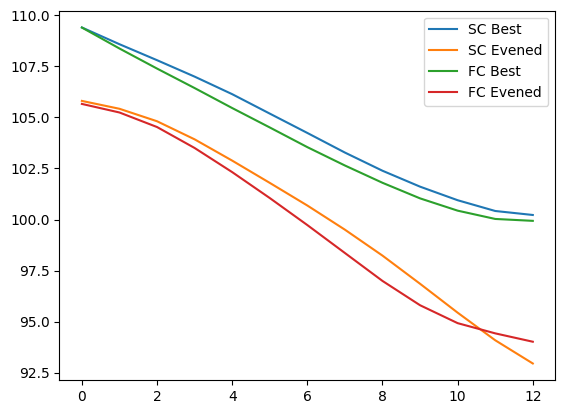

In [28]:
plt.plot(sc_best_curve, label="SC Best")
plt.plot(sc_evened_curve, label="SC Evened")
plt.plot(fc_best_curve, label="FC Best")
plt.plot(fc_evened_curve, label="FC Evened")

plt.legend()
plt.show()

In [10]:
sc_best = "experiment_2S_C/M1_128_12/wise-glitter-464/epoch_120"
sc_evened =  "experiment_2S_C/M1_128_12/fiery-bee-484/epoch_9"
fc_best = "experiment_2F_C/M1_128_12/youthful-firebrand-483/epoch_75"
fc_evened = "experiment_2F_C/M1_128_12/youthful-firebrand-483/epoch_15"

sc_best_curve = get_curvature(sc_best, val_data_C)
sc_evened_curve = get_curvature(sc_evened, val_data_C)
fc_best_curve = get_curvature(fc_best, val_data_CF)
fc_evened_curve = get_curvature(fc_evened, val_data_CF)

100%|██████████| 5000/5000 [00:35<00:00, 138.95it/s]
5000it [02:11, 37.89it/s]
100%|██████████| 5000/5000 [00:34<00:00, 143.58it/s]
5000it [02:12, 37.76it/s]
100%|██████████| 4000/4000 [00:25<00:00, 154.80it/s]
4000it [00:14, 275.69it/s]
100%|██████████| 4000/4000 [00:25<00:00, 156.84it/s]
4000it [00:14, 275.36it/s]


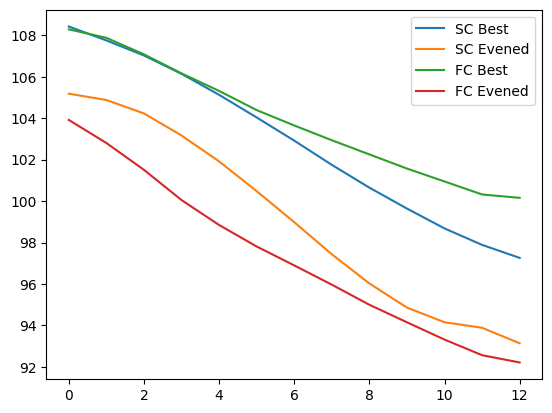

In [11]:
plt.plot(sc_best_curve, label="SC Best")
plt.plot(sc_evened_curve, label="SC Evened")
plt.plot(fc_best_curve, label="FC Best")
plt.plot(fc_evened_curve, label="FC Evened")

plt.legend()
plt.show()

In [26]:
len(val_data_CF[4])

128

In [12]:
sc_best = "experiment_2S_C/M1_128_12/wise-glitter-464/epoch_120"
sc_evened =  "experiment_2S_C/M1_128_12/fiery-bee-484/epoch_9"
fc_best = "experiment_2F_C/M1_128_12/youthful-firebrand-483/epoch_75"
fc_evened = "experiment_2F_C/M1_128_12/youthful-firebrand-483/epoch_15"

sc_best_curve_R = get_curvature(sc_best, val_data_CF)
sc_evened_curve_R = get_curvature(sc_evened, val_data_CF)
fc_best_curve_R = get_curvature(fc_best, val_data_C)
fc_evened_curve_R = get_curvature(fc_evened, val_data_C)

100%|██████████| 4000/4000 [00:25<00:00, 155.25it/s]
4000it [00:14, 274.60it/s]
100%|██████████| 4000/4000 [00:25<00:00, 156.43it/s]
4000it [00:14, 269.92it/s]
  0%|          | 0/5000 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (15) must match the size of tensor b (128) at non-singleton dimension 3

In [4]:
#Finding curvature on checkpoints where loss is equal to final checkpoint loss of m2_b (as it was the highest) 

#run 1
m1 = "experiment_1/M1_128_12/fallen-pyramid-437/epoch_25"

m2_b = "experiment_1/M2_B_128_12/iconic-wind-394/final_chkpoint"
m2_t = "experiment_1/M2_T_128_12/lyric-glitter-438/epoch_7"
m2_f = "experiment_1/M2_F_128_12/whole-cloud-439/epoch_6"


models = [m1, m2_b, m2_t, m2_f]
model_names = ["M1", "M2_B", "M2_T", "M2_F"]

data_sources = [val_data_A, val_data_B, val_data_T, val_data_F]
data_names = ["A", "B", "T", "F"]

results_dict = pickle.load(open(f"{path}/experiment_1/evened_curvature_results.pkl", "rb"))

for model_name, model in zip(model_names, models):
    # results_dict[model_name] = {}
    for data_name, data in zip(data_names, data_sources):
        results_dict[model_name][data_name] = [get_curvature(model, data)]
        # results_dict[model_name][data_name].append(get_curvature(model, data))

        with open(f"{path}/experiment_1/evened_curvature_results.pkl", "wb") as f:
            pickle.dump(results_dict, f)
        
        print(f"Finished {model_name} on {data_name} data")

 18%|█▊        | 910/5000 [00:07<00:31, 131.88it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [00:38<00:00, 129.11it/s]
5000it [02:27, 33.91it/s]


Finished M1 on A data


100%|██████████| 5000/5000 [00:37<00:00, 134.48it/s]
5000it [02:27, 34.01it/s]


Finished M1 on B data


100%|██████████| 5000/5000 [00:37<00:00, 134.30it/s]
5000it [02:27, 33.85it/s]


Finished M1 on T data


100%|██████████| 5000/5000 [00:37<00:00, 133.53it/s]
5000it [02:27, 33.91it/s]


Finished M1 on F data


100%|██████████| 5000/5000 [00:37<00:00, 133.71it/s]
5000it [02:27, 33.91it/s]


Finished M2_B on A data


100%|██████████| 5000/5000 [00:37<00:00, 133.95it/s]
5000it [02:27, 33.87it/s]


Finished M2_B on B data


100%|██████████| 5000/5000 [00:37<00:00, 133.23it/s]
5000it [02:27, 33.92it/s]


Finished M2_B on T data


100%|██████████| 5000/5000 [00:37<00:00, 134.17it/s]
5000it [02:27, 33.90it/s]


Finished M2_B on F data


100%|██████████| 5000/5000 [00:37<00:00, 134.54it/s]
5000it [02:27, 33.93it/s]


Finished M2_T on A data


100%|██████████| 5000/5000 [00:37<00:00, 133.86it/s]
5000it [02:27, 33.85it/s]


Finished M2_T on B data


100%|██████████| 5000/5000 [00:37<00:00, 134.34it/s]
5000it [02:27, 33.82it/s]


Finished M2_T on T data


100%|██████████| 5000/5000 [00:37<00:00, 133.41it/s]
5000it [02:26, 34.06it/s]


Finished M2_T on F data


100%|██████████| 5000/5000 [00:37<00:00, 134.99it/s]
5000it [02:27, 33.88it/s]


Finished M2_F on A data


100%|██████████| 5000/5000 [00:37<00:00, 134.33it/s]
5000it [02:27, 33.89it/s]


Finished M2_F on B data


100%|██████████| 5000/5000 [00:37<00:00, 133.51it/s]
5000it [02:27, 33.96it/s]


Finished M2_F on T data


100%|██████████| 5000/5000 [00:37<00:00, 134.30it/s]
5000it [02:27, 33.88it/s]


Finished M2_F on F data


In [14]:
#run 1 (should be the first curvature in the results dict)
m1 = "experiment_1/M1_128_12/faithful-elevator-344/epoch_80"

m2_b = "experiment_1/M2_B_128_12/iconic-wind-394/final_chkpoint"
m2_t = "experiment_1/M2_T_128_12/tough-elevator-395/final_chkpoint"
m2_f = "experiment_1/M2_F_128_12/swift-bird-397/final_chkpoint"

m3_b = "experiment_1/M3_B_128_12/twilight-bird-373/final_chkpoint" 
m3_t = "experiment_1/M3_T_128_12/fiery-sound-390/epoch_300"

#run 2 (should be the second curvature in the results dict)
m1 = "experiment_1/M1_128_12/rare-silence-401/epoch_40"

m2_b = "experiment_1/M2_B_128_12/grateful-wave-405/final_chkpoint"
m2_t = "experiment_1/M2_T_128_12/clear-mountain-406/final_chkpoint"
m2_f = "experiment_1/M2_F_128_12/tough-sky-408/final_chkpoint"

m3_b = "experiment_1/M3_B_128_12/true-surf-409/epoch_75" 
m3_t = "experiment_1/M3_T_128_12/deft-lake-419/final_chkpoint"

#run 3 - tried to improve these two models slightly

m2_f = "experiment_1/M2_F_128_12/dainty-brook-452/final_chkpoint"
m3_t = "experiment_1/M3_T_128_12/pious-violet-441/final_chkpoint"



models = ["untrained", "gpt2", m1, m2_b, m2_t, m2_f, m3_b, m3_t]
model_names = ["untrained", "gpt2", "M1", "M2_B", "M2_T", "M2_F", "M3_B", "M3_T"]

models = [m2_f, m3_t]
model_names = ["M2_F", "M3_T"]

data_sources = [val_data_A, val_data_B, val_data_T, val_data_F, random_data]
data_names = ["A", "B", "T", "F", "R"]


results_dict = pickle.load(open(f"{path}/experiment_1/curvature_results.pkl", "rb"))

for model_name, model in zip(model_names, models):
    # results_dict[model_name] = {}
    for data_name, data in zip(data_names, data_sources):
        # results_dict[model_name][data_name] = [get_curvature(model, data)]
        results_dict[model_name][data_name].append(get_curvature(model, data))

        with open(f"{path}/experiment_1/curvature_results.pkl", "wb") as f:
            pickle.dump(results_dict, f)
        
        print(f"Finished {model_name} on {data_name} data")

100%|██████████| 5000/5000 [00:38<00:00, 131.54it/s]
5000it [02:23, 34.74it/s]


Finished M2_F on A data


100%|██████████| 5000/5000 [00:37<00:00, 132.25it/s]
5000it [02:24, 34.58it/s]


Finished M2_F on B data


100%|██████████| 5000/5000 [00:38<00:00, 130.65it/s]
5000it [02:24, 34.53it/s]


Finished M2_F on T data


100%|██████████| 5000/5000 [00:38<00:00, 131.51it/s]
5000it [02:24, 34.63it/s]


Finished M2_F on F data


100%|██████████| 5000/5000 [00:38<00:00, 131.57it/s]
5000it [02:24, 34.64it/s]


Finished M2_F on R data


100%|██████████| 5000/5000 [00:37<00:00, 131.66it/s]
5000it [02:24, 34.65it/s]


Finished M3_T on A data


100%|██████████| 5000/5000 [00:38<00:00, 130.84it/s]
5000it [02:24, 34.49it/s]


Finished M3_T on B data


100%|██████████| 5000/5000 [00:37<00:00, 132.51it/s]
5000it [02:24, 34.54it/s]


Finished M3_T on T data


100%|██████████| 5000/5000 [00:42<00:00, 117.43it/s]
5000it [02:42, 30.69it/s]


Finished M3_T on F data


100%|██████████| 5000/5000 [00:42<00:00, 116.87it/s]
5000it [02:43, 30.51it/s]


Finished M3_T on R data


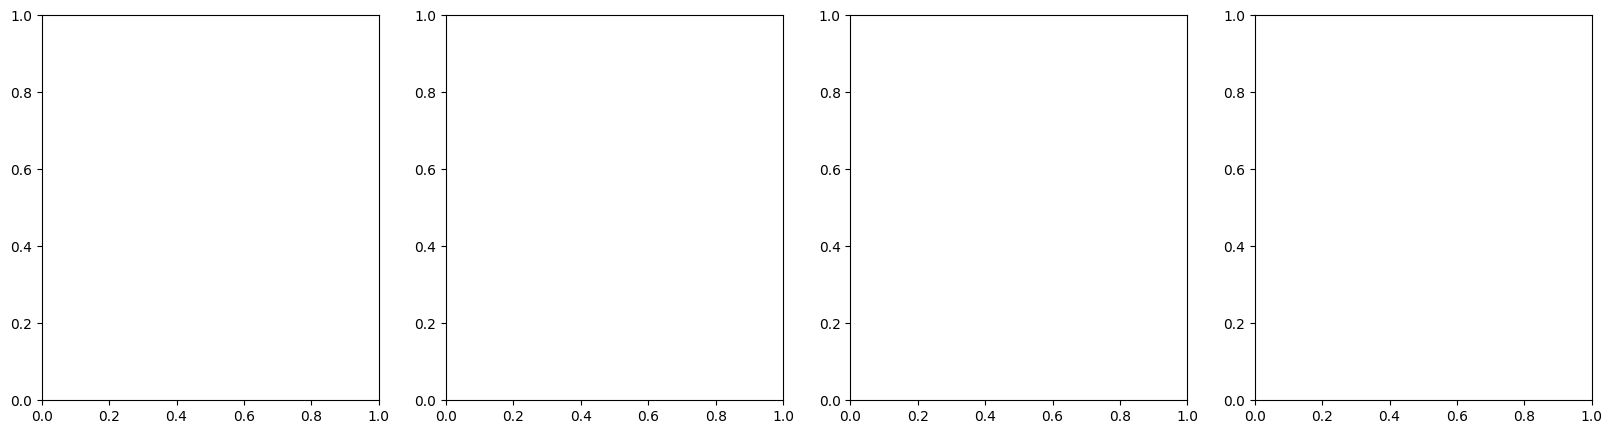

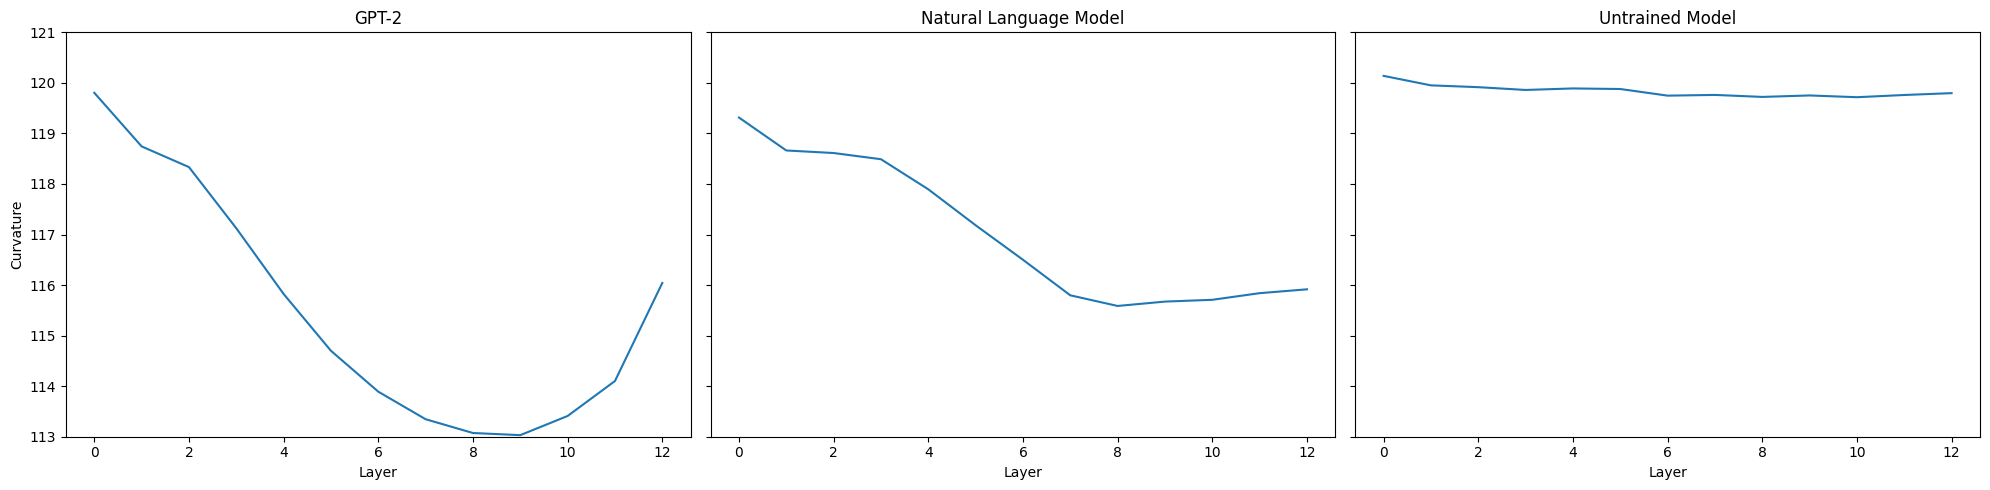

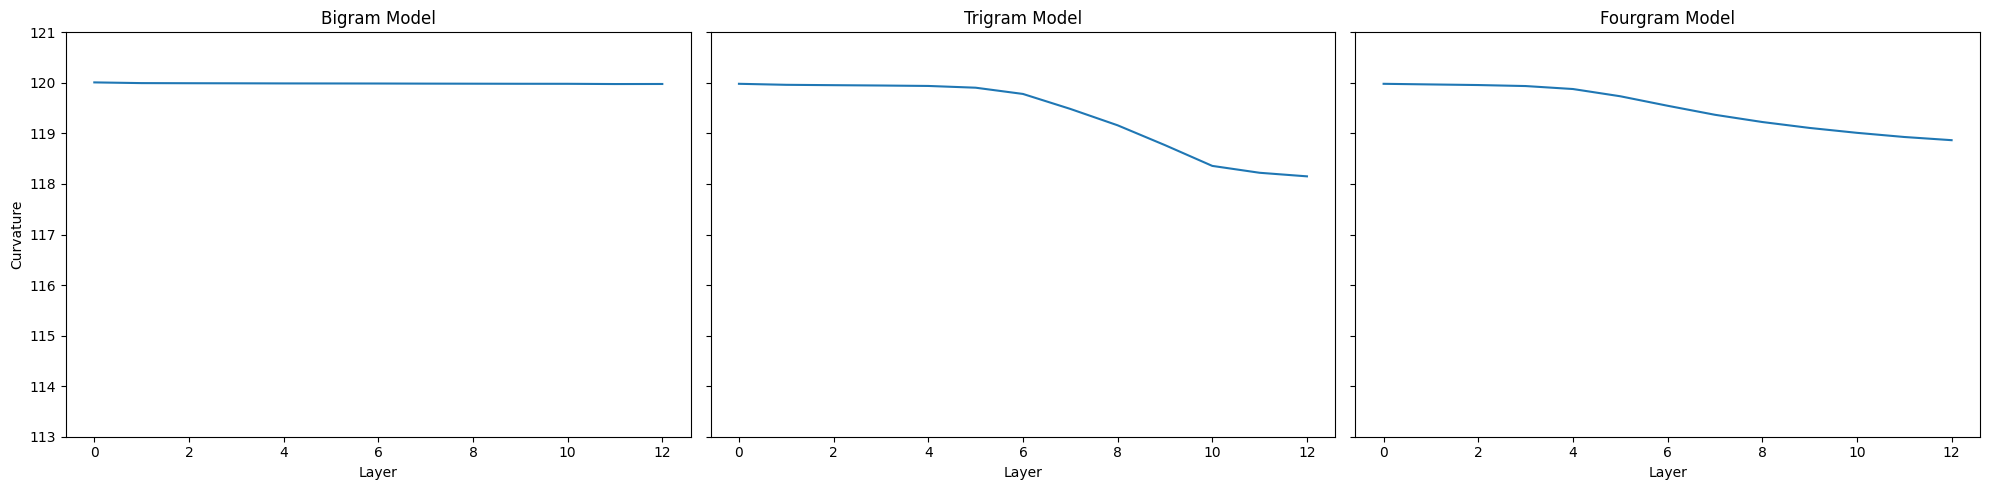

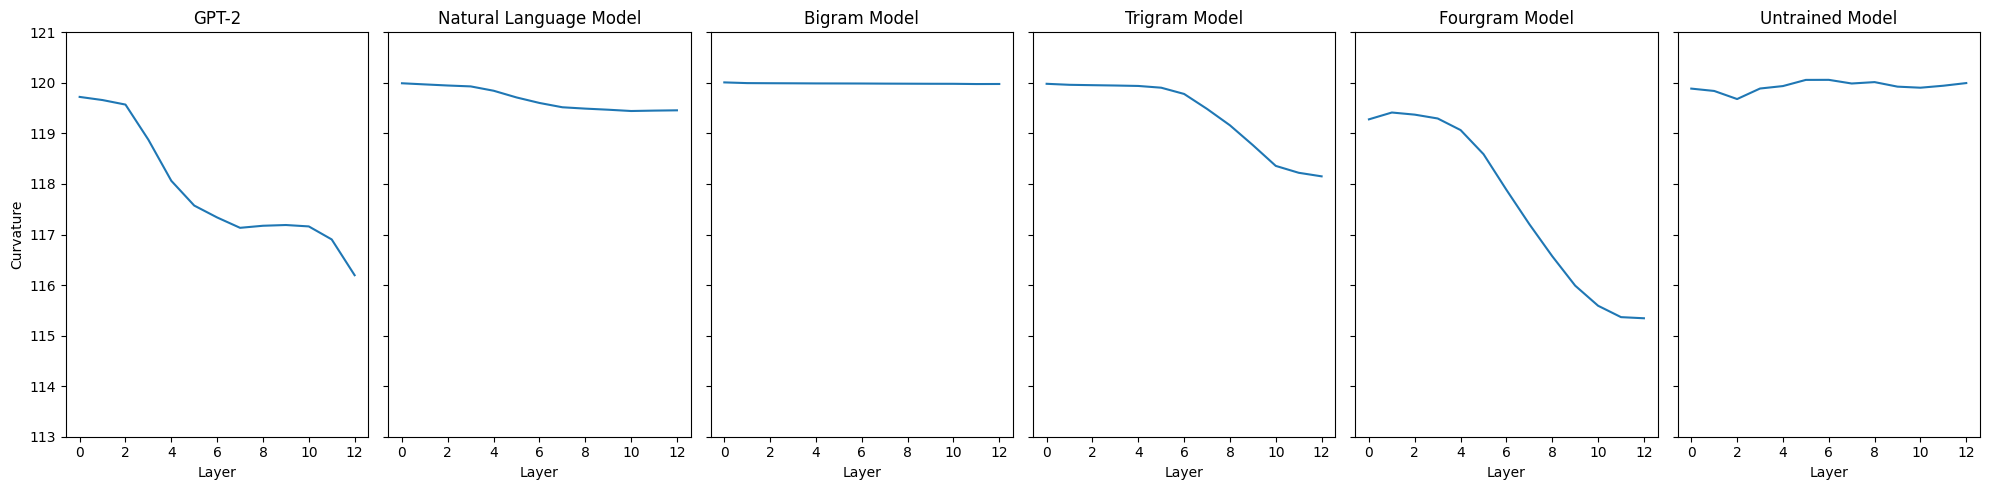

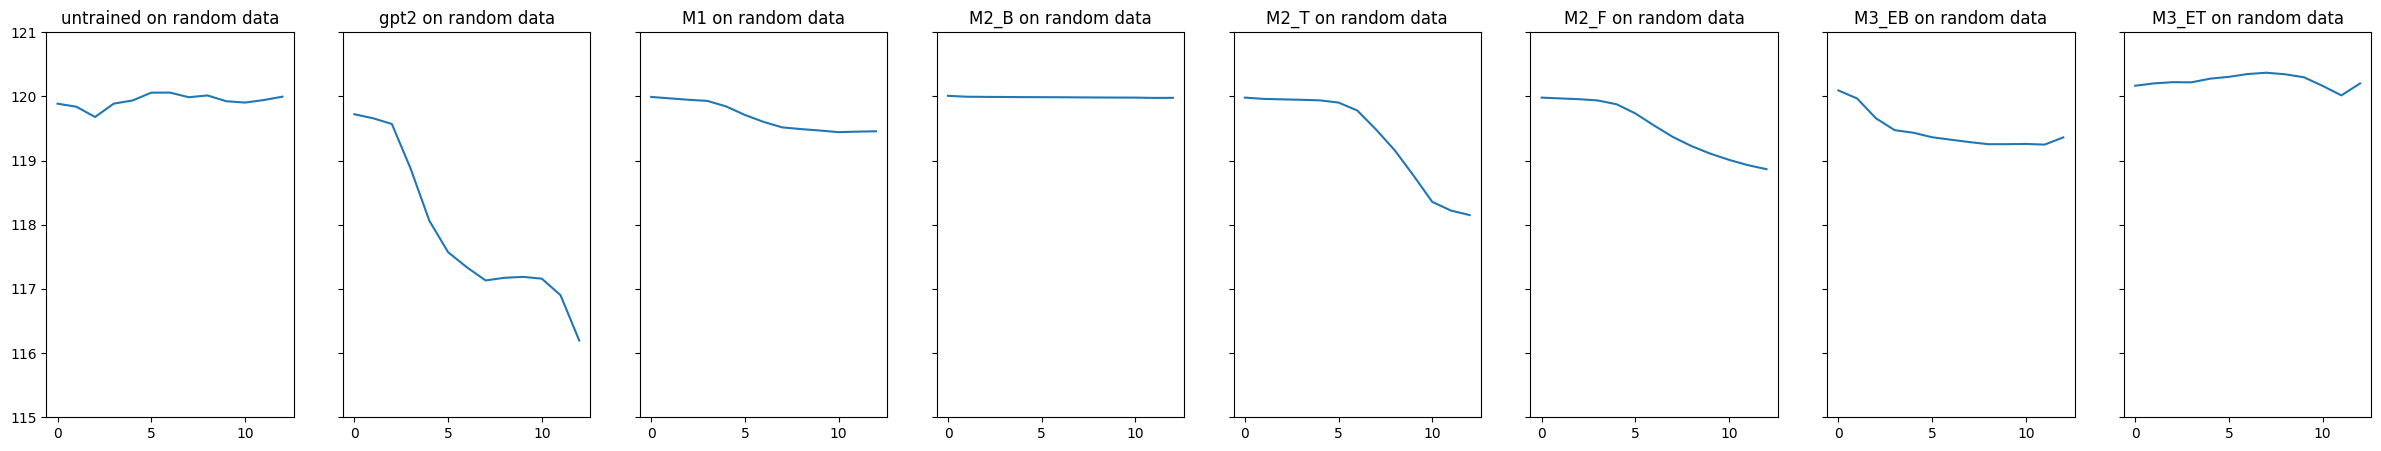

In [15]:
experiment_1_results = pickle.load(open(f"{path}/experiment_1/curvature_results.pkl", "rb"))
experiment_1_results_evened = pickle.load(open(f"{path}/experiment_1/evened_curvature_results.pkl", "rb"))

# model_names = ["untrained", "gpt2", "M1", "M2_B", "M2_T", "M2_F", "M3_B", "M3_T"]
# data_names = ["A", "B", "T", "F"]

# fig, axs = plt.subplots(4, 8, figsize=(30, 20))

# for i, model_name in enumerate(model_names):
#     for j, data_name in enumerate(data_names):
#         for curve in experiment_1_results[model_name][data_name]:
#             axs[j, i].plot(curve)
#         axs[j, i].set_title(f"{model_name} on {data_name} data")
#         if model_name in experiment_1_results_evened:
#             axs[j, i].plot(experiment_1_results_evened[model_name][data_name][0], linestyle="--")

# #set y axis bounds for all plots
# for ax in axs.flat:
#     ax.set_ylim(113, 121)
#     ax.label_outer()

# plt.legend()
# plt.tight_layout()
# plt.show()


#plot only on each model's corresponding data
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# axs[0].plot(experiment_1_results["untrained"]["A"][0])
# axs[0].set_title("untrained on A data")
# axs[1].plot(experiment_1_results["gpt2"]["A"][0])
# axs[1].set_title("gpt2 on A data")
# axs[2].plot(experiment_1_results["M1"]["A"][0])
# axs[2].plot(experiment_1_results_evened["M1"]["A"][0], linestyle="--")
# axs[2].set_title("M1 on A data")
# axs[3].plot(experiment_1_results["M2_B"]["B"][0])
# axs[3].plot(experiment_1_results_evened["M2_B"]["B"][0], linestyle="--")
# axs[3].set_title("M2_B on B data")
# axs[4].plot(experiment_1_results["M2_T"]["T"][0])
# axs[4].plot(experiment_1_results_evened["M2_T"]["T"][0], linestyle="--")
# axs[4].set_title("M2_T on T data")
# axs[5].plot(experiment_1_results["M2_F"]["F"][0])
# axs[5].plot(experiment_1_results_evened["M2_F"]["F"][0], linestyle="--")
# axs[5].set_title("M2_F on F data")
# axs[6].plot(experiment_1_results["M3_EB"]["EB"][0])
# axs[6].set_title("M3_B on B data")
# axs[7].plot(experiment_1_results["M3_ET"]["ET"][0])
# axs[7].set_title("M3_T on T data")
# axs[8].plot(experiment_1_results["M3_EF"]["EF"][0])
# axs[8].set_title("M3_F on F data")

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title("GPT-2")
axs[0].plot(experiment_1_results["gpt2"]["A"][0])
axs[0].set_xlabel("Layer")
axs[0].set_ylabel("Curvature")

axs[1].set_title("Natural Language Model")
axs[1].plot(experiment_1_results["M1"]["A"][0])
axs[1].set_xlabel("Layer")

axs[2].set_title("Untrained Model")
axs[2].plot(experiment_1_results["untrained"]["A"][0])
axs[2].set_xlabel("Layer")


#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].set_title("Bigram Model")
axs[0].plot(experiment_1_results["M2_B"]["R"][0])
axs[0].set_xlabel("Layer")
axs[0].set_ylabel("Curvature")

axs[1].set_title("Trigram Model")
axs[1].plot(experiment_1_results["M2_T"]["R"][0])
axs[1].set_xlabel("Layer")

axs[2].set_title("Fourgram Model")
axs[2].plot(experiment_1_results["M2_F"]["R"][0])
axs[2].set_xlabel("Layer")




#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 6, figsize=(20, 5))

axs[0].set_title("GPT-2")
axs[0].plot(experiment_1_results["gpt2"]["R"][0])
axs[0].set_xlabel("Layer")
axs[0].set_ylabel("Curvature")

axs[1].set_title("Natural Language Model")
axs[1].plot(experiment_1_results["M1"]["R"][0])
axs[1].set_xlabel("Layer")

axs[2].set_title("Bigram Model")
axs[2].plot(experiment_1_results["M2_B"]["R"][0])
axs[2].set_xlabel("Layer")

axs[3].set_title("Trigram Model")
axs[3].plot(experiment_1_results["M2_T"]["R"][0])
axs[3].set_xlabel("Layer")

axs[4].set_title("Fourgram Model")
axs[4].plot(experiment_1_results["M2_F"]["T"][0])
axs[4].set_xlabel("Layer")

axs[5].set_title("Untrained Model")
axs[5].plot(experiment_1_results["untrained"]["R"][0])
axs[5].set_xlabel("Layer")


#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.tight_layout()
plt.show()

model_names = ["untrained", "gpt2", "M1", "M2_B", "M2_T", "M2_F", "M3_EB", "M3_ET"]

#plot random data
fig, axs = plt.subplots(1, 8, figsize=(30, 5))

for i, model_name in enumerate(model_names):
    axs[i].plot(experiment_1_results[model_name]["R"][0])
    axs[i].set_title(f"{model_name} on random data")

#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(115, 121)
    ax.label_outer()

plt.show()


In [6]:
m3_eb = "natural_language/class_128_12/azure-night-3/final_chkpoint" 
m3_et = "natural_language/class_128_12/devout-donkey-4/epoch_105"
m3_ef = "natural_language/class_128_12/wobbly-eon-5/epoch_120"

b = get_curvature(m3_eb, val_data_EB)
t = get_curvature(m3_et, val_data_ET)
f = get_curvature(m3_ef, val_data_EF)

OSError: Incorrect path_or_model_id: '/om2/user/jackking/modular_transformers/scripts/input_statistics/data/natural_language/class_128_12/azure-night-3/final_chkpoint'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [63]:
# Retrying gram type models with data that should be easier to predict (classes shuffled up more)

dr_path = "/om2/user/jackking/modular_transformers/scripts/dimensionality_reduction"

m2_eb = "natural_language/lm_128_12/wandering-eon-7/epoch_40" 
m2_et = "natural_language/lm_128_12/fearless-surf-9/epoch_120" 
m2_ef = "natural_language/lm_128_12/stellar-snowflake-10/epoch_120" 

m3_eb = "natural_language/class_128_12/azure-night-3/final_chkpoint" 
m3_et = "natural_language/class_128_12/devout-donkey-4/epoch_105"
m3_ef = "natural_language/class_128_12/wobbly-eon-5/epoch_120"

models = ["untrained", "gpt2", m2_eb, m2_et, m2_ef, m3_eb, m3_et, m3_ef]
model_names = ["untrained", "gpt2", "M2_EB", "M2_ET", "M2_EF", "M3_EB", "M3_ET", "M3_EF"]

data_sources = [val_data_EB, val_data_ET, val_data_EF, random_data]
data_names = ["EB", "ET", "EF", "R"]

results_dict = {}

for model_name, model in zip(model_names, models):
    results_dict[model_name] = {}
    for data_name, data in zip(data_names, data_sources):
        results_dict[model_name][data_name] = [get_curvature(model, data)]
        # results_dict[model_name][data_name].append(get_curvature(model, data))

        with open(f"{dr_path}/curvature_results.pkl", "wb") as f:
            pickle.dump(results_dict, f)
        
        print(f"Finished {model_name} on {data_name} data")



100%|██████████| 5000/5000 [00:33<00:00, 150.36it/s]
5000it [02:07, 39.27it/s]


Finished M3_EB on EB data


100%|██████████| 5000/5000 [00:33<00:00, 150.02it/s]
5000it [02:08, 38.89it/s]

Finished M3_EB on R data


In [17]:
# Retrying gram type models with data that should be easier to predict (classes shuffled up more)

# dr_path = "/om2/user/jackking/modular_transformers/scripts/dimensionality_reduction"

m2_et = "natural_language/lm_128_12/fearless-surf-9/epoch_60" 
m2_ef = "natural_language/lm_128_12/stellar-snowflake-10/epoch_40" 

m3_eb = "natural_language/class_128_12/azure-night-3/epoch_15" 
m3_et = "natural_language/class_128_12/devout-donkey-4/epoch_15"

models = [m2_eb, m2_et, m3_eb, m3_et]
model_names = ["M2_EB", "M2_ET", "M3_EB", "M3_ET"]

data_sources = [val_data_EB, val_data_ET, val_data_EF, random_data]
data_names = ["EB", "ET", "EF", "R"]

results_dict = {}

for model_name, model in zip(model_names, models):
    results_dict[model_name] = {}
    for data_name, data in zip(data_names, data_sources):
        results_dict[model_name][data_name] = [get_curvature(model, data)]
        # results_dict[model_name][data_name].append(get_curvature(model, data))

        with open(f"{path}/curvature_results_evened.pkl", "wb") as f:
            pickle.dump(results_dict, f)
        
        print(f"Finished {model_name} on {data_name} data")

 99%|█████████▉| 1162/1170 [00:08<00:00, 134.35it/s]

100%|██████████| 1170/1170 [00:08<00:00, 135.05it/s]
1170it [00:32, 35.52it/s]


Finished M2_EB on EB data


100%|██████████| 1170/1170 [00:08<00:00, 137.60it/s]
1170it [00:32, 35.50it/s]


Finished M2_EB on ET data


100%|██████████| 1170/1170 [00:08<00:00, 137.63it/s]
1170it [00:32, 35.57it/s]


Finished M2_EB on EF data


100%|██████████| 5000/5000 [00:37<00:00, 134.54it/s]
5000it [02:19, 35.79it/s]


Finished M2_EB on R data


100%|██████████| 1170/1170 [00:08<00:00, 136.61it/s]
1170it [00:32, 35.81it/s]


Finished M2_ET on EB data


100%|██████████| 1170/1170 [00:08<00:00, 137.85it/s]
1170it [00:32, 35.82it/s]


Finished M2_ET on ET data


100%|██████████| 1170/1170 [00:08<00:00, 137.68it/s]
1170it [00:32, 35.76it/s]


Finished M2_ET on EF data


100%|██████████| 5000/5000 [00:36<00:00, 135.31it/s]
5000it [02:20, 35.67it/s]


Finished M2_ET on R data


100%|██████████| 1170/1170 [00:08<00:00, 136.05it/s]
1170it [00:32, 35.64it/s]


Finished M3_EB on EB data


100%|██████████| 1170/1170 [00:08<00:00, 137.16it/s]
1170it [00:32, 35.66it/s]


Finished M3_EB on ET data


100%|██████████| 1170/1170 [00:08<00:00, 136.90it/s]
1170it [00:32, 35.74it/s]


Finished M3_EB on EF data


100%|██████████| 5000/5000 [00:36<00:00, 136.07it/s]
5000it [02:20, 35.65it/s]


Finished M3_EB on R data


100%|██████████| 1170/1170 [00:08<00:00, 135.91it/s]
1170it [00:33, 35.41it/s]


Finished M3_ET on EB data


100%|██████████| 1170/1170 [00:08<00:00, 136.84it/s]
1170it [00:32, 35.78it/s]


Finished M3_ET on ET data


100%|██████████| 1170/1170 [00:08<00:00, 136.42it/s]
1170it [00:32, 35.74it/s]


Finished M3_ET on EF data


100%|██████████| 5000/5000 [00:36<00:00, 136.03it/s]
5000it [02:20, 35.69it/s]


Finished M3_ET on R data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


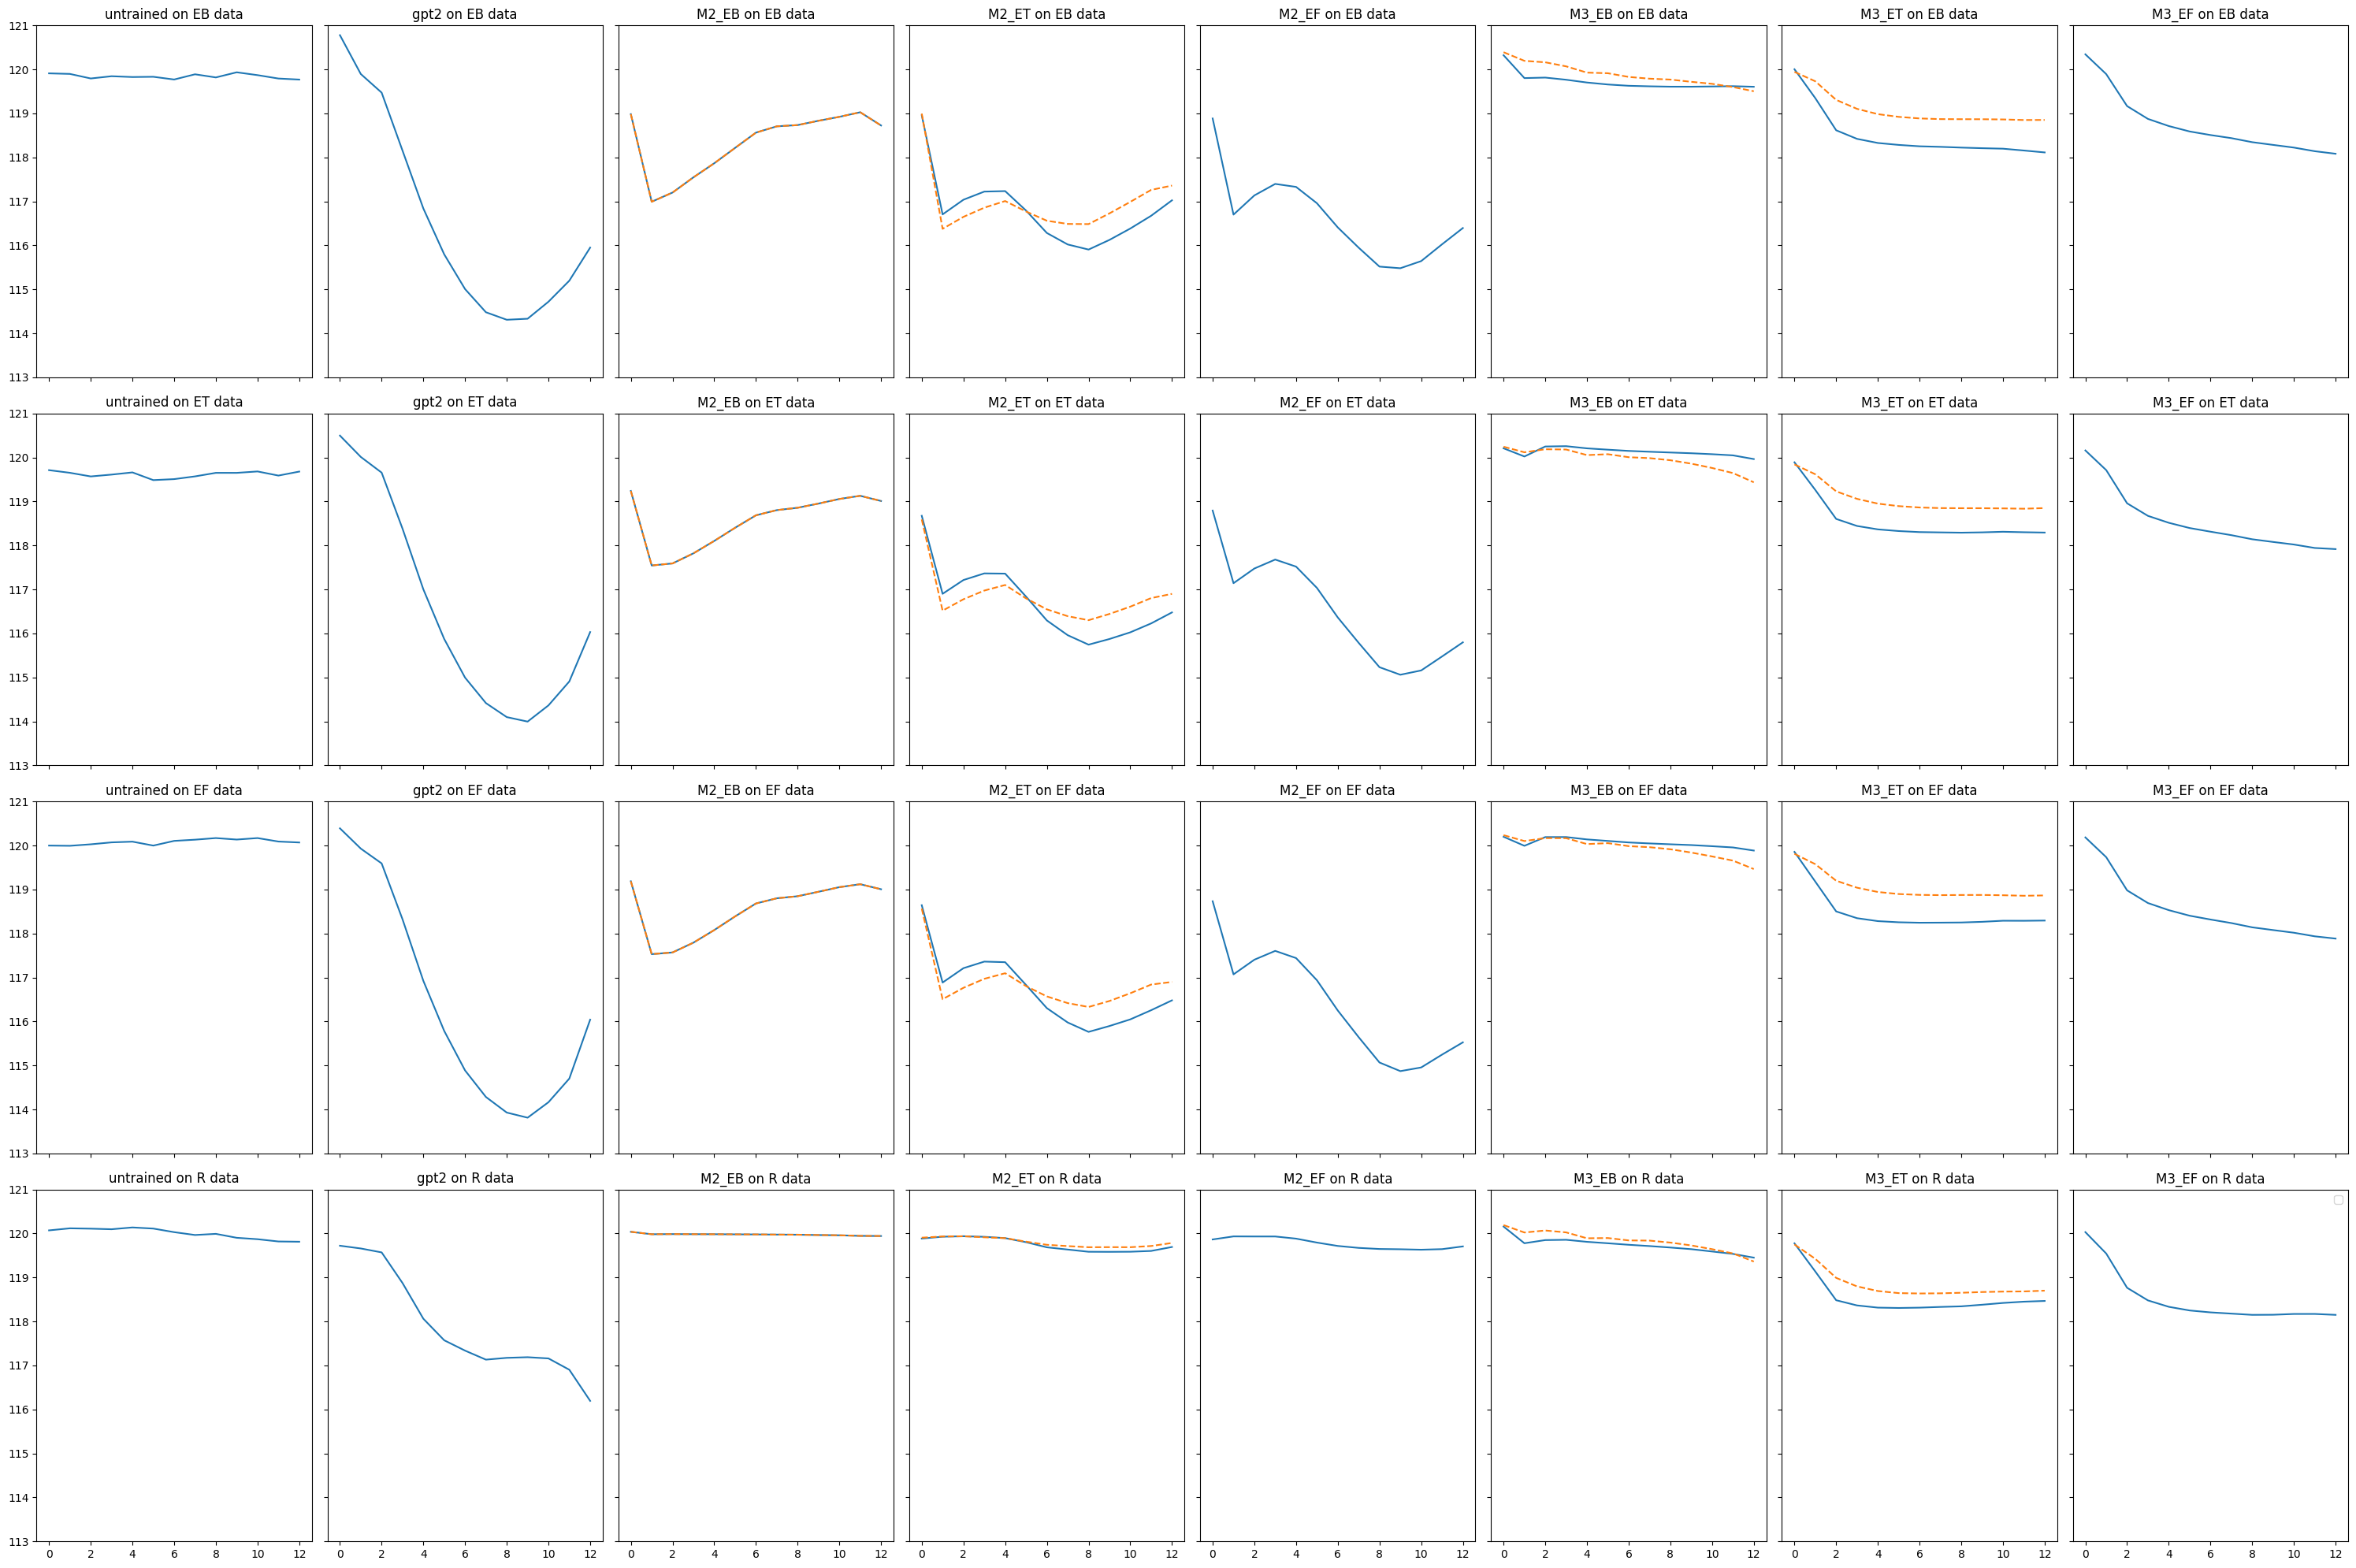

In [18]:
results = pickle.load(open(f"{dr_path}/curvature_results.pkl", "rb"))
results_evened = pickle.load(open(f"{dr_path}/curvature_results_evened.pkl", "rb"))

model_names = ["untrained", "gpt2", "M2_EB", "M2_ET", "M2_EF", "M3_EB", "M3_ET", "M3_EF"]
data_names = ["EB", "ET", "EF", "R"]

fig, axs = plt.subplots(4, 8, figsize=(30, 20))

for i, model_name in enumerate(model_names):
    for j, data_name in enumerate(data_names):
        for curve in results[model_name][data_name]:
            axs[j, i].plot(curve)
        axs[j, i].set_title(f"{model_name} on {data_name} data")
        if model_name in results_evened:
            axs[j, i].plot(results_evened[model_name][data_name][0], linestyle="--")

#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'M3_F'

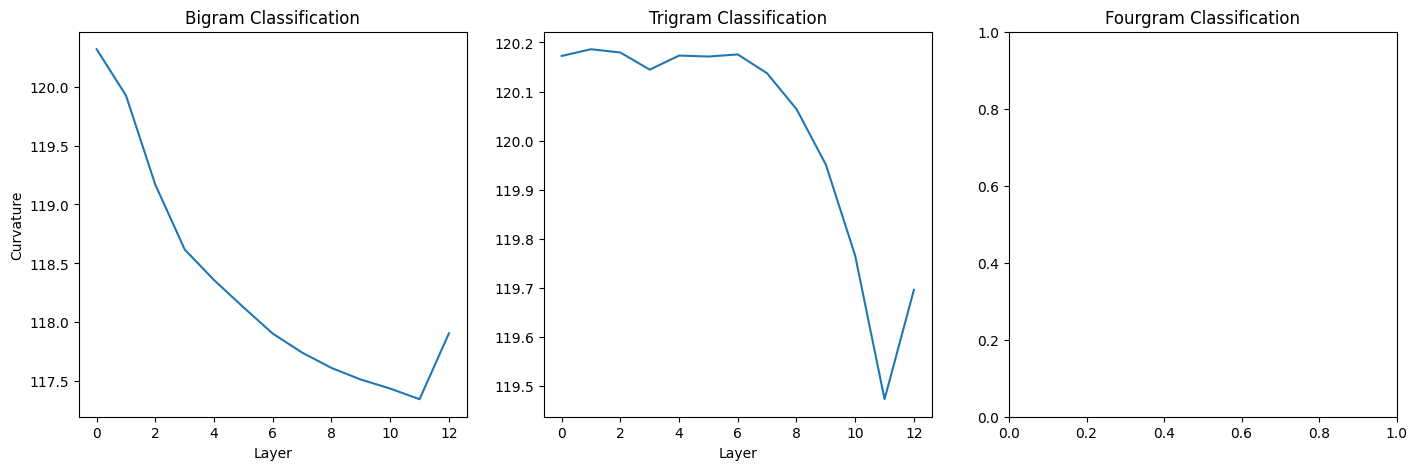

In [9]:
dr_path = "/om2/user/jackking/modular_transformers/scripts/dimensionality_reduction"

results = experiment_1_results


fig, axs = plt.subplots(1, 3, figsize=(17, 5))

axs[0].set_title("Bigram Classification")
axs[0].plot(results["M3_EB"]["EB"][0])
axs[0].set_xlabel("Layer")
axs[0].set_ylabel("Curvature")

axs[1].set_title("Trigram Classification")
axs[1].plot(results["M3_ET"]["ET"][0])
axs[1].set_xlabel("Layer")

axs[2].set_title("Fourgram Classification")
axs[2].plot(results["M3_EF"]["EF"][0])
axs[2].set_xlabel("Layer")

for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(17, 5))

axs[0].set_title("Bigram Classification")
axs[0].plot(results["M3_EB"]["R"][0])
axs[0].set_xlabel("Layer")
axs[0].set_ylabel("Curvature")

axs[1].set_title("Trigram Classification")
axs[1].plot(results["M3_ET"]["R"][0])
axs[1].set_xlabel("Layer")

axs[2].set_title("Fourgram Classification")
axs[2].plot(results["M3_EF"]["R"][0])
axs[2].set_xlabel("Layer")

for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.tight_layout()
plt.show()

In [ ]:
#seeing if m2_f1 straightens -- part of a secondary test in notes
m2_f1 = "experiment_1/M2_F1_128_12/wild-fog-455/final_chkpoint"
curve = get_curvature(m2_f1, val_data_F1)
plt.plot(curve, label="On F")
curve = get_curvature(m2_f1, val_data_A)
plt.plot(curve, label="On A")
curve = get_curvature(m2_f1, random_data)
plt.plot(curve, label="On R")
plt.legend()
plt.show()

In [ ]:
#matching m1_C with experiment 1 m1 loss - showing that the super low curvature is not just about really low loss

m1_c = "experiment_2S_C/M1_128_12/devout-durian-444/epoch_2"
curve = get_curvature(m1_c, val_data_C)
plt.plot(curve)
plt.show()
curve = get_curvature(m1_c, random_data)
plt.plot(curve)


In [31]:
#round 1
m1_c = "experiment_2S_C/M1_128_12/splendid-star-366/epoch_120"
m2_c = "experiment_2S_C/M2_128_12/wild-sound-364/epoch_200"

m1_d = "experiment_2S_D/M1_128_12/polar-firefly-368/final_chkpoint"
m2_d = "experiment_2S_D/M2_128_12/clear-shadow-369/final_chkpoint"

m1_f = "experiment_2S_F/M1_128_12/amber-aardvark-460/epoch_120"
m2_f = "experiment_2S_F/M2_128_12/polished-water-457/epoch_173"

m1_g = "experiment_2S_G/M1_128_12/twilight-vortex-462/final_chkpoint"
m2_g = "experiment_2S_G/M2_128_12/clean-pyramid-461/final_chkpoint" 

#c round 2 for checking that results are consistent
m1_c = "experiment_2S_C/M1_128_12/rural-glitter-445/epoch_136"
m2_c = "experiment_2S_C/M2_128_12/likely-cosmos-447/epoch_200"

#round 3 for all for final verification of order of straightening
m1_c = "experiment_2S_C/M1_128_12/wise-glitter-464/epoch_120" #16
m1_d = "experiment_2S_D/M1_128_12/feasible-forest-465/epoch_120" #3
m1_f = "experiment_2S_F/M1_128_12/vivid-wind-466/epoch_120" #8
m1_g = "experiment_2S_G/M1_128_12/fragrant-elevator-468/final_chkpoint" #24

# models = ["untrained", "gpt2", m1_c, m2_c, m1_d, m2_d, m1_f, m2_f]
# model_names = ["untrained", "gpt2", "M1_C", "M2_C", "M1_D", "M2_D", "M1_F", "M2_F"]

models = [m1_c, m1_d, m1_f, m1_g]
model_names = ["M1_C", "M1_D", "M1_F", "M1_G"]

data_sources = [val_data_C, val_data_D, random_data, val_data_F, val_data_G]
data_names = ["C", "D", "R", "F", "G"]

results_dict = pickle.load(open(f"{path}/experiment_2S/curvature_results.pkl", "rb"))

for model_name, model in zip(model_names, models):
    # results_dict[model_name] = {}
    for data_name, data in zip(data_names, data_sources):
        # results_dict[model_name][data_name] = [get_curvature(model, data)]
        results_dict[model_name][data_name].append(get_curvature(model, data))

        with open(f"{path}/experiment_2S/curvature_results.pkl", "wb") as f:
            pickle.dump(results_dict, f)

        print(f"Finished {model_name} on {data_name} data")

  0%|          | 15/5000 [00:00<00:34, 143.61it/s]

100%|██████████| 5000/5000 [00:33<00:00, 147.55it/s]
5000it [02:10, 38.35it/s]


Finished M1_C on C data


100%|██████████| 4000/4000 [00:27<00:00, 146.18it/s]
4000it [01:44, 38.35it/s]


Finished M1_C on D data


100%|██████████| 5000/5000 [00:33<00:00, 148.26it/s]
5000it [02:10, 38.31it/s]


Finished M1_C on R data


100%|██████████| 5000/5000 [00:34<00:00, 145.96it/s]
5000it [02:10, 38.31it/s]


Finished M1_C on F data


100%|██████████| 5000/5000 [00:33<00:00, 147.46it/s]
5000it [02:10, 38.30it/s]


Finished M1_C on G data


100%|██████████| 5000/5000 [00:33<00:00, 147.80it/s]
5000it [02:10, 38.29it/s]


Finished M1_D on C data


100%|██████████| 4000/4000 [00:27<00:00, 146.37it/s]
4000it [01:44, 38.25it/s]


Finished M1_D on D data


100%|██████████| 5000/5000 [00:33<00:00, 148.11it/s]
5000it [02:08, 38.82it/s]


Finished M1_D on R data


100%|██████████| 5000/5000 [00:33<00:00, 150.83it/s]
5000it [02:07, 39.13it/s]


Finished M1_D on F data


100%|██████████| 5000/5000 [00:33<00:00, 151.00it/s]
5000it [02:07, 39.13it/s]


Finished M1_D on G data


100%|██████████| 5000/5000 [00:33<00:00, 151.08it/s]
5000it [02:07, 39.24it/s]


Finished M1_F on C data


100%|██████████| 4000/4000 [00:26<00:00, 149.27it/s]
4000it [01:42, 39.16it/s]


Finished M1_F on D data


100%|██████████| 5000/5000 [00:33<00:00, 151.40it/s]
5000it [02:07, 39.16it/s]


Finished M1_F on R data


100%|██████████| 5000/5000 [00:33<00:00, 151.11it/s]
5000it [02:07, 39.16it/s]


Finished M1_F on F data


100%|██████████| 5000/5000 [00:33<00:00, 150.89it/s]
5000it [02:07, 39.30it/s]


Finished M1_F on G data


100%|██████████| 5000/5000 [00:33<00:00, 150.81it/s]
5000it [02:07, 39.11it/s]


Finished M1_G on C data


100%|██████████| 4000/4000 [00:26<00:00, 148.80it/s]
4000it [01:42, 39.04it/s]


Finished M1_G on D data


100%|██████████| 5000/5000 [00:33<00:00, 151.29it/s]
5000it [02:07, 39.17it/s]


Finished M1_G on R data


100%|██████████| 5000/5000 [00:33<00:00, 149.28it/s]
5000it [02:08, 39.05it/s]


Finished M1_G on F data


100%|██████████| 5000/5000 [00:33<00:00, 150.93it/s]
5000it [02:07, 39.17it/s]

Finished M1_G on G data


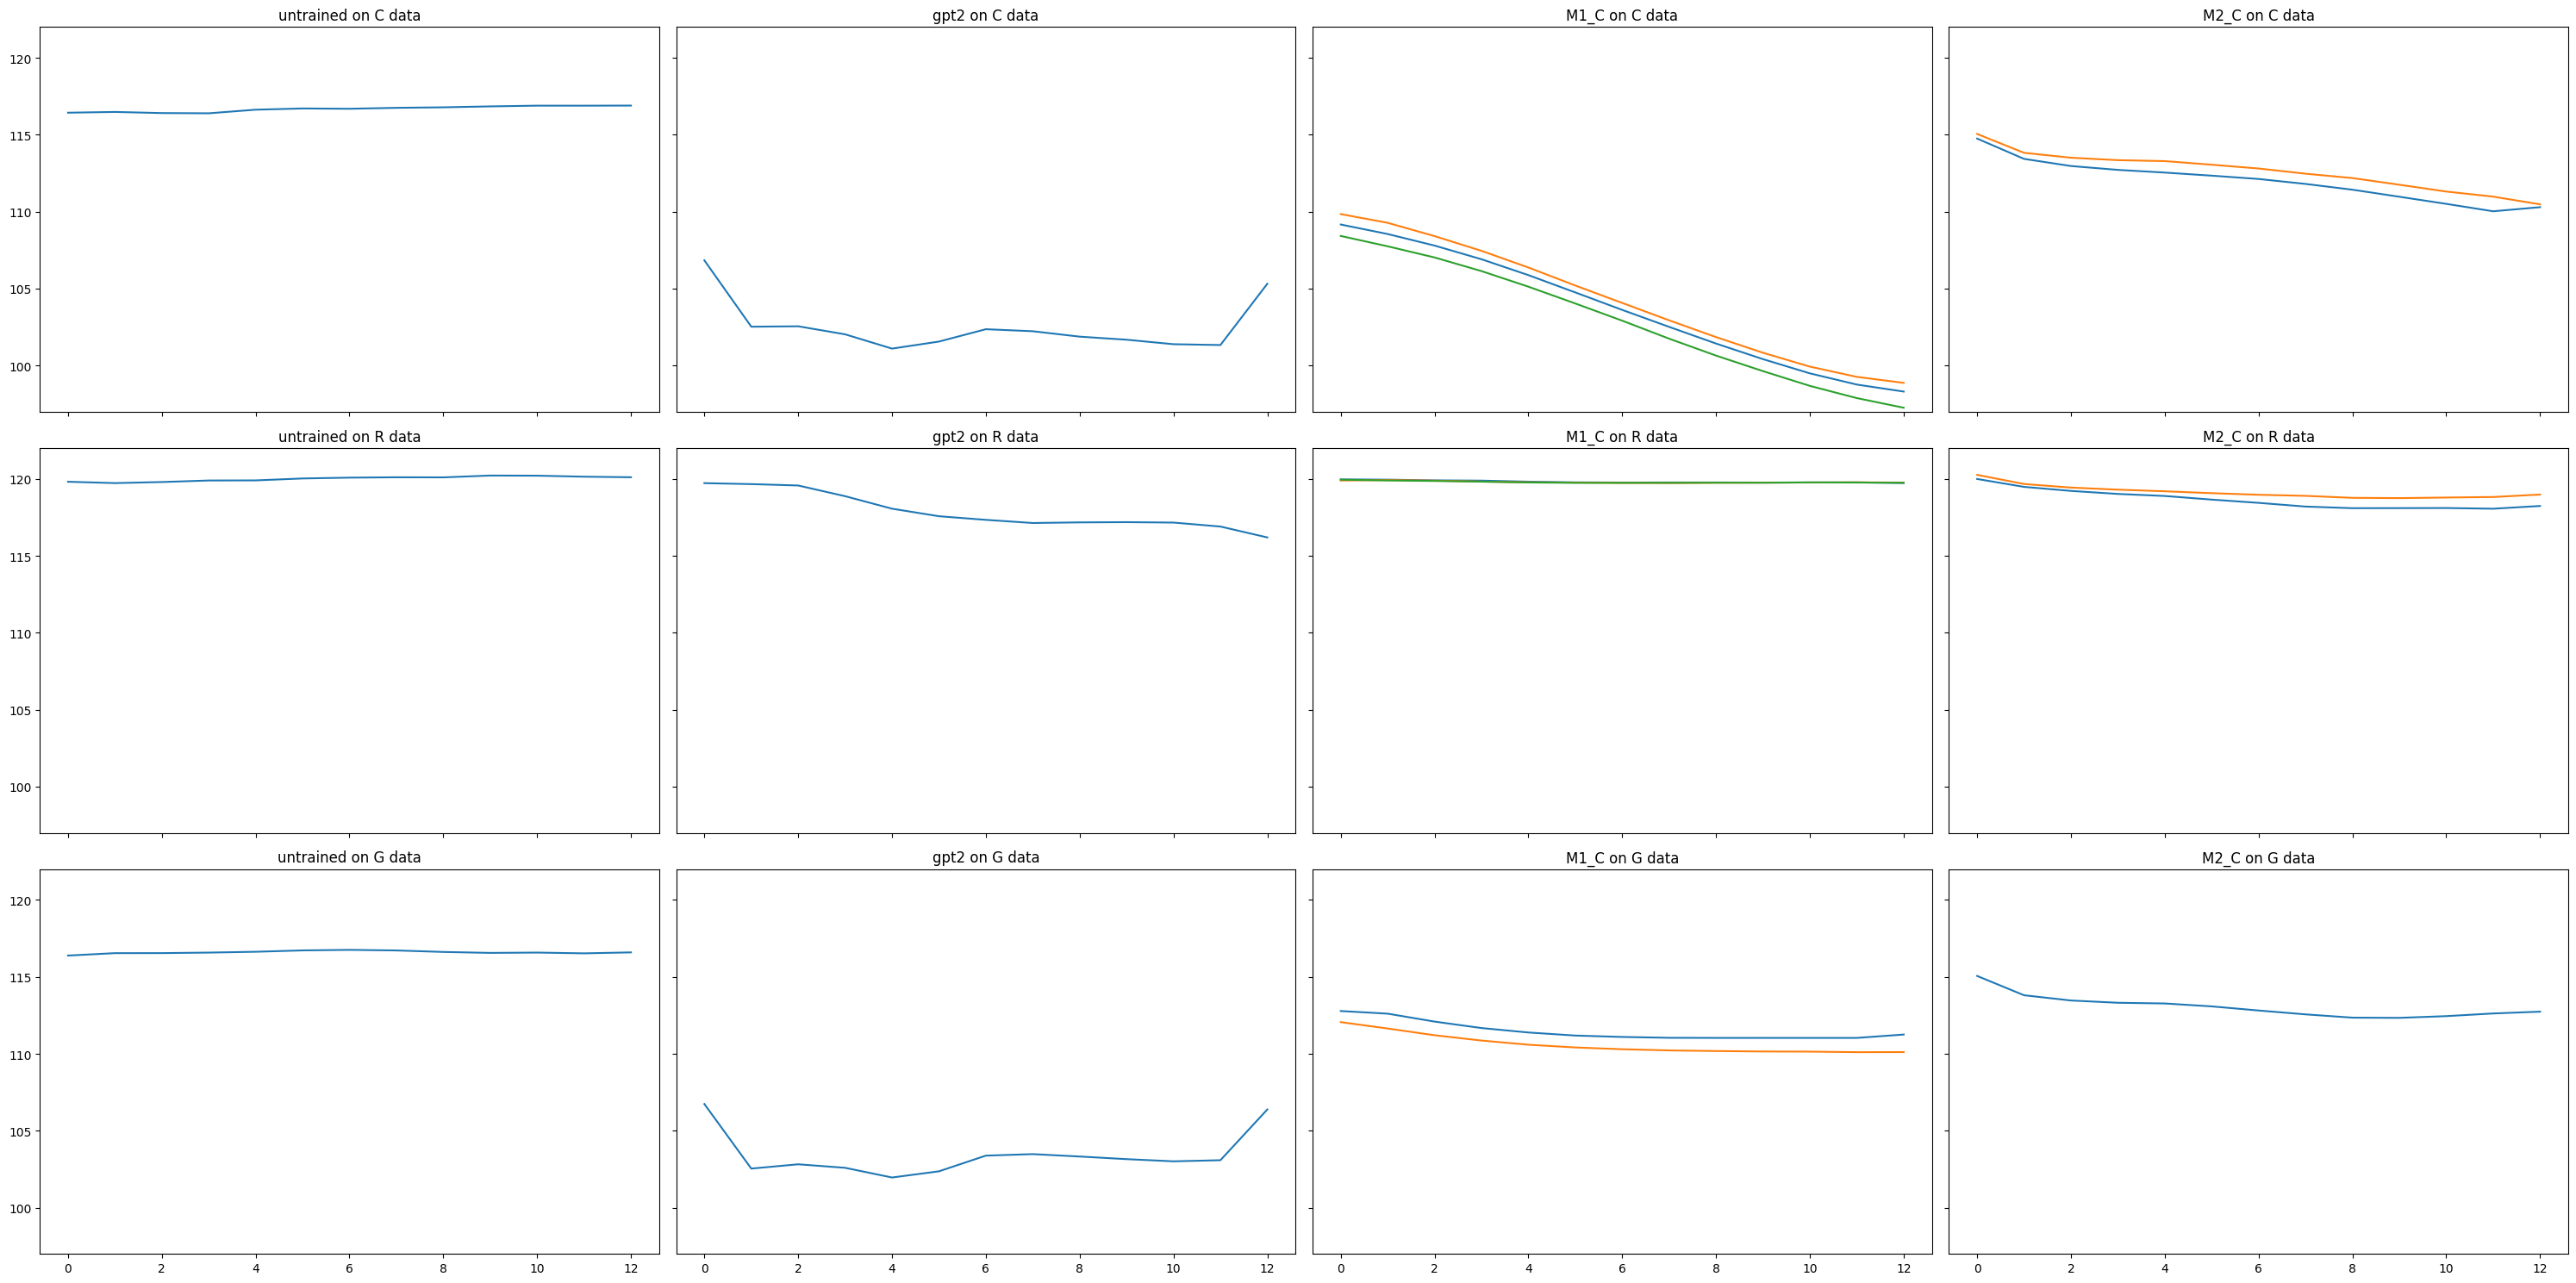

3905it [01:49, 35.67it/s]


KeyboardInterrupt: 

In [15]:
#showing all experiment 2 results

experiment_2S_results = pickle.load(open(f"{path}/experiment_2S/curvature_results.pkl", "rb"))
model_names = ["untrained", "gpt2", "M1_C", "M2_C", "M1_D", "M2_D", "M1_F", "M2_F", "M1_G", "M2_G"]
data_names = ["C", "D", "F", "G", "R"]

model_names = ["untrained", "gpt2", "M1_C", "M2_C"]
data_names = ["C", "R", "G"]

fig, axs = plt.subplots(3, 4, figsize=(30, 15))

for i, model_name in enumerate(model_names):
    for j, data_name in enumerate(data_names):
        try:
            for curve in experiment_2S_results[model_name][data_name]:
                axs[j, i].plot(curve)
            axs[j, i].set_title(f"{model_name} on {data_name} data")
        except:
            pass

for ax in axs.flat:
    ax.set_ylim(97, 122)
    ax.label_outer()

plt.tight_layout()
plt.show()

In [ ]:
#showing all experiment 2 results

experiment_2S_results = pickle.load(open(f"{path}/experiment_2S/curvature_results.pkl", "rb"))
model_names = ["untrained", "gpt2", "M1_C", "M2_C", "M1_D", "M2_D", "M1_F", "M2_F", "M1_G", "M2_G"]
data_names = ["C", "D", "F", "G", "R"]

model_names = ["untrained", "gpt2", "M1_C", "M2_C"]
data_names = ["C", "R", "G"]

fig, axs = plt.subplots(3, 4, figsize=(30, 15))

for i, model_name in enumerate(model_names):
    for j, data_name in enumerate(data_names):
        try:
            for curve in experiment_2S_results[model_name][data_name]:
                axs[j, i].plot(curve)
            axs[j, i].set_title(f"{model_name} on {data_name} data")
        except:
            pass

for ax in axs.flat:
    ax.set_ylim(97, 122)
    ax.label_outer()

plt.tight_layout()
plt.show()

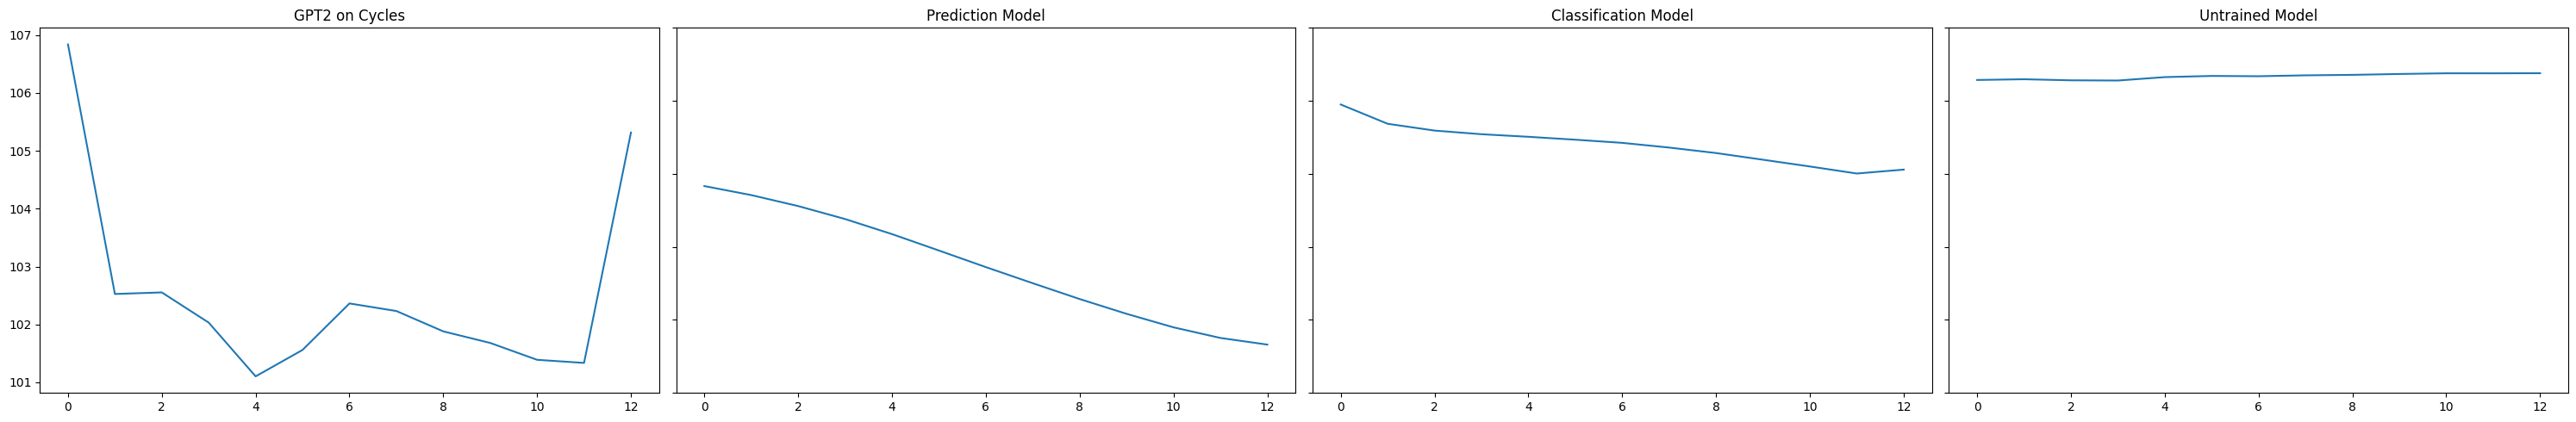

In [22]:
# showing cycle length experiment results

experiment_2S_results = pickle.load(open(f"{path}/experiment_2S/curvature_results.pkl", "rb"))

#plot only on each model's corresponding data
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

axs[0].plot(experiment_2S_results["gpt2"]["C"][0])
axs[0].set_title("GPT2 on Cycles")

axs[1].plot(experiment_2S_results["M1_C"]["C"][0])
axs[1].set_title("Prediction Model")

axs[2].plot(experiment_2S_results["M2_C"]["C"][0])
axs[2].set_title("Classification Model")

axs[3].plot(experiment_2S_results["untrained"]["C"][0])
axs[3].set_title("Untrained Model")

# set y axis bounds for all plots
for ax in axs.flat[1:]:
    ax.set_ylim(95, 120)
    ax.label_outer()

# axs[0].legend()
plt.tight_layout()
plt.show()

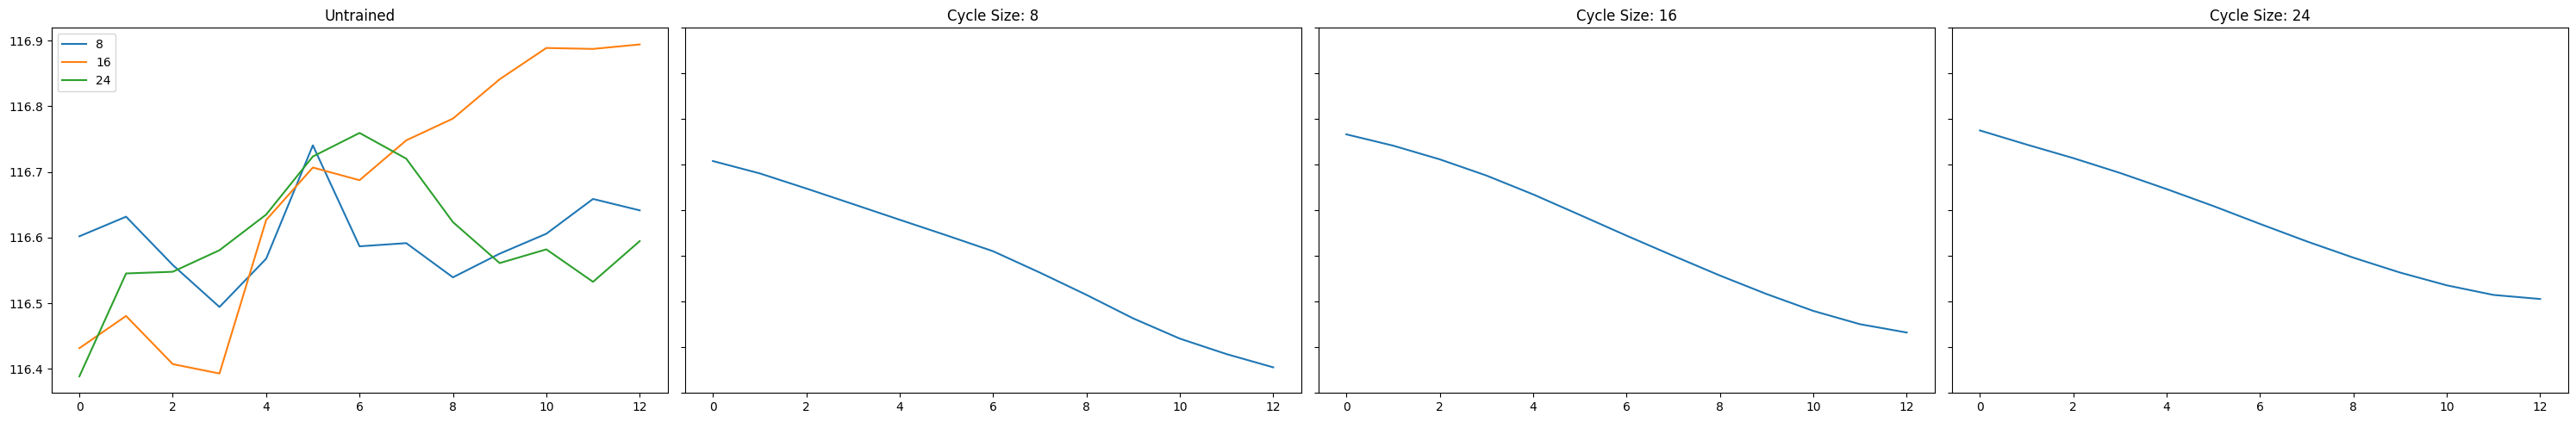

In [17]:
# showing cycle length experiment results

experiment_2S_results = pickle.load(open(f"{path}/experiment_2S/curvature_results.pkl", "rb"))

#plot only on each model's corresponding data
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

axs[0].plot(experiment_2S_results["untrained"]["F"][0], label="8")
axs[0].plot(experiment_2S_results["untrained"]["C"][0], label="16")
axs[0].plot(experiment_2S_results["untrained"]["G"][0], label="24")
axs[0].set_title("Untrained")

axs[1].plot(experiment_2S_results["M1_F"]["F"][0])
# axs[1].plot(experiment_2S_results["M1_F"]["F"][1])
axs[1].set_title("Cycle Size: 8")

axs[2].plot(experiment_2S_results["M1_C"]["C"][0])
# axs[2].plot(experiment_2S_results["M1_C"]["C"][1])
axs[2].set_title("Cycle Size: 16")

axs[3].plot(experiment_2S_results["M1_G"]["G"][0])
# axs[3].plot(experiment_2S_results["M1_G"]["G"][1])
axs[3].set_title("Cycle Size: 24")
#set y axis bounds for all plots
for ax in axs.flat[1:]:
    ax.set_ylim(95, 115)
    ax.label_outer()

axs[0].legend()
plt.tight_layout()
plt.show()

In [5]:
r1 = "random/R1_128_12/balmy-sunset-413/final_chkpoint"
r2 = "random/R2_128_12/honest-rain-414/epoch_10"
x1 = "random/X1_128_12/sandy-monkey-416/final_chkpoint"

x1_b = "random/X1_B_128_12/cool-river-421/final_chkpoint"
x1_b = "random/X1_B_128_12/treasured-pond-432/final_chkpoint"

x2 = "random/X2_128_12/whole-smoke-420/final_chkpoint"
x2_b = "random/X2_B_128_12/whole-sound-422/final_chkpoint"

models = [r2, x1, x1_b, x2, x2_b]
model_names = ["R2", "X1", "X1_B", "X2", "X2_B"]

# models = [x1_b]
# model_names = ["X1_B"]

data_sources = [val_data_B]
data_names = ["B"]

results_dict = pickle.load(open(f"{path}/random/curvature_results.pkl", "rb"))

for model_name, model in zip(model_names, models):
    for data_name, data in zip(data_names, data_sources):
        results_dict[model_name][data_name] = [get_curvature(model, data)]

        with open(f"{path}/random/curvature_results.pkl", "wb") as f:
            pickle.dump(results_dict, f)

        print(f"Finished {model_name} on {data_name} data")

 14%|█▍        | 721/5000 [00:08<00:29, 143.68it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [00:38<00:00, 131.16it/s]
5000it [02:07, 39.12it/s]


Finished R2 on B data


100%|██████████| 5000/5000 [00:34<00:00, 146.29it/s]
5000it [02:07, 39.25it/s]


Finished X1 on B data


100%|██████████| 5000/5000 [00:33<00:00, 147.30it/s]
5000it [02:07, 39.24it/s]


Finished X1_B on B data


100%|██████████| 5000/5000 [00:34<00:00, 146.43it/s]
5000it [02:07, 39.32it/s]


Finished X2 on B data


100%|██████████| 5000/5000 [00:34<00:00, 146.37it/s]
5000it [02:07, 39.34it/s]

Finished X2_B on B data


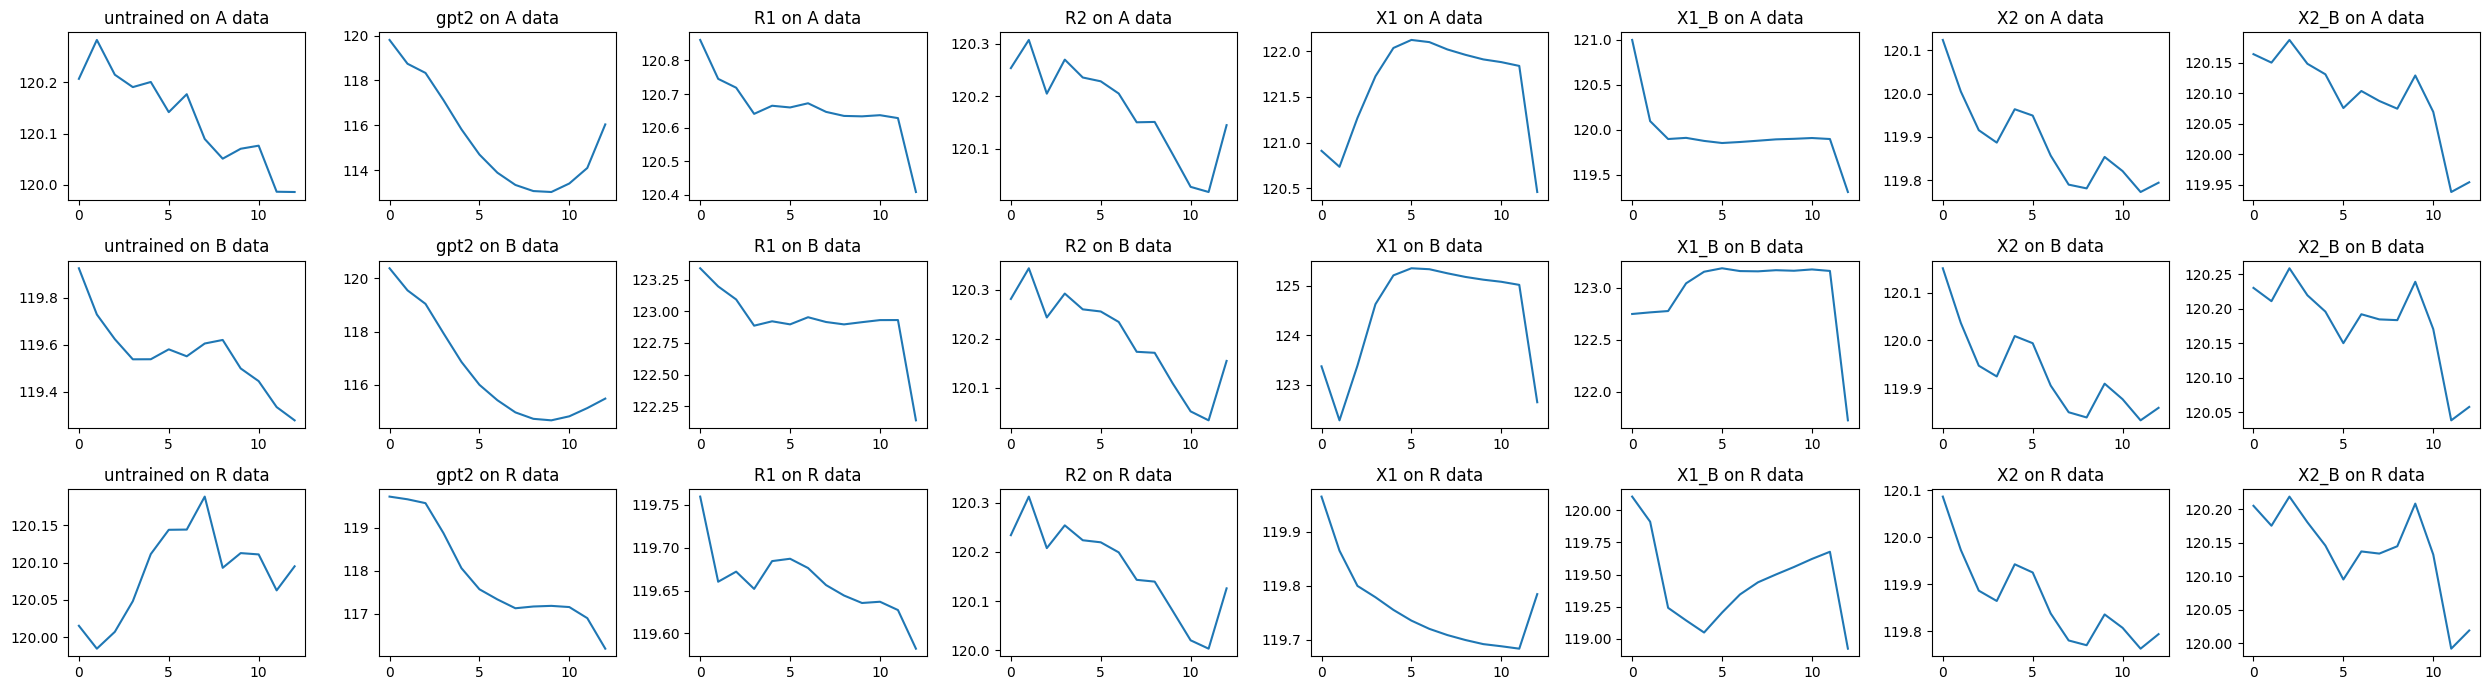

In [8]:
random_results = pickle.load(open(f"{path}/random/curvature_results.pkl", "rb"))
model_names = ["untrained", "gpt2", "R1", "R2", "X1", "X1_B", "X2", "X2_B"]
data_names = ["A", "B", "R"]

fig, axs = plt.subplots(3, 8, figsize=(25, 7))

for i, model_name in enumerate(model_names):
    for j, data_name in enumerate(data_names):
        axs[j, i].plot(random_results[model_name][data_name][0])
        axs[j, i].set_title(f"{model_name} on {data_name} data")

# for ax in axs.flat:
#     ax.set_ylim(115, 121)
#     ax.label_outer()

plt.tight_layout()
plt.show()

100%|██████████| 5000/5000 [03:08<00:00, 26.49it/s]
5000it [05:31, 15.07it/s]


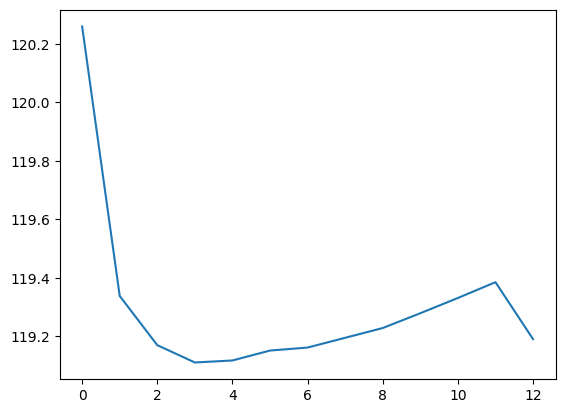

In [7]:
name = "experiment_1/M2_B_128_12/warm-grass-388/epoch_40"
curve = get_curvature(name, val_data_B)
plt.plot(curve)

In [9]:
name = "experiment_1/M2_B_128_12/warm-grass-388/epoch_40"
model_path = f'{path}/{name}'
model = GPT2LMHeadModel.from_pretrained(model_path)

100%|██████████| 5000/5000 [01:33<00:00, 53.35it/s]
5000it [05:29, 15.16it/s]


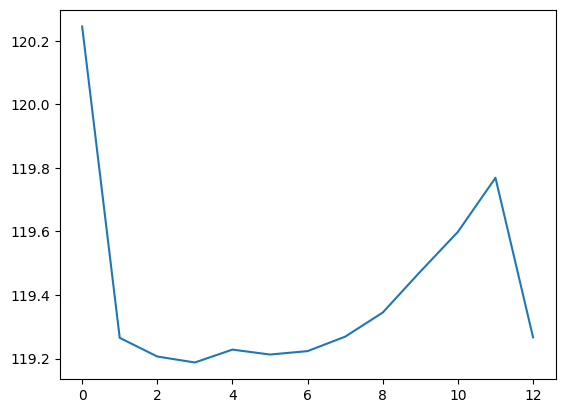

In [8]:
name = "experiment_1/M2_B_128_12/genial-leaf-391/final_chkpoint"
curve = get_curvature(name, val_data_B)
plt.plot(curve)

100%|██████████| 5000/5000 [01:40<00:00, 49.83it/s]
5000it [10:45,  7.75it/s]


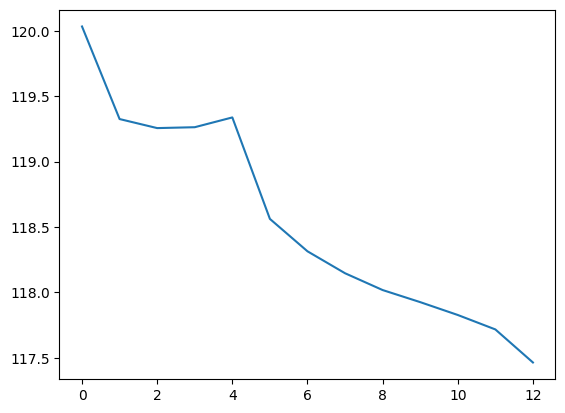

In [60]:
name = "experiment_1/M2_T_768_12/skilled-snowflake-383/epoch_35"
curve = get_curvature(name, val_data_T)
plt.plot(curve)

100%|██████████| 5000/5000 [01:25<00:00, 58.79it/s]
5000it [03:54, 21.30it/s]


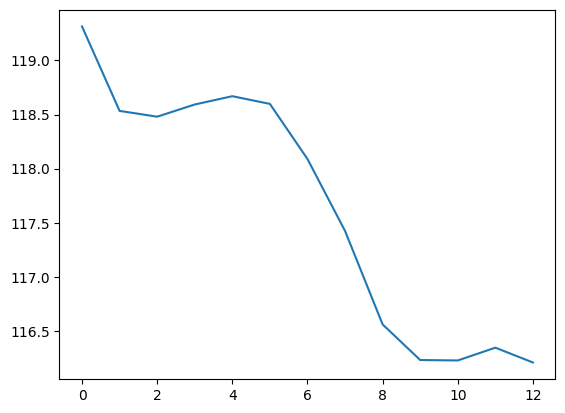

In [61]:
name = "experiment_1/M2_T_128_12/devoted-blaze-375/epoch_40"
curve = get_curvature(name, val_data_T)
plt.plot(curve)

100%|██████████| 5000/5000 [01:39<00:00, 50.10it/s]
5000it [11:37,  7.16it/s]


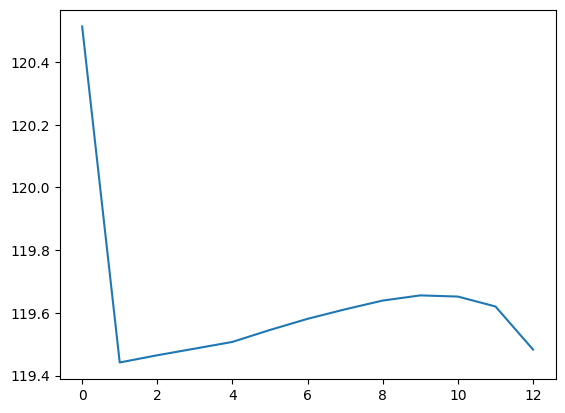

In [59]:
name = "experiment_1/M2_B_768_12/lively-salad-379/epoch_20"
curve = get_curvature(name, val_data_B)
plt.plot(curve)

100%|██████████| 5000/5000 [01:49<00:00, 45.86it/s]
5000it [10:36,  7.85it/s]


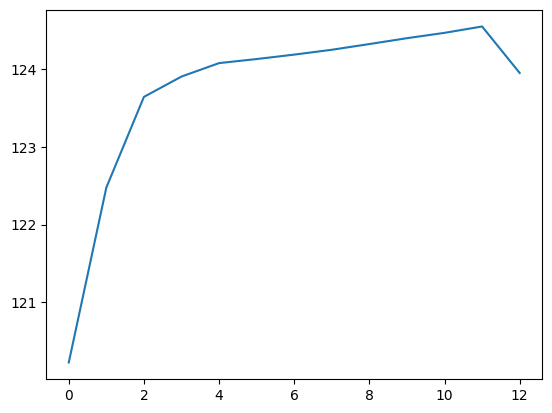

In [58]:
name = "experiment_1/M2_B_768_12/lively-salad-379/epoch_0"
curve = get_curvature(name, val_data_B)
plt.plot(curve)

 14%|█▍        | 716/5000 [00:12<01:11, 59.53it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [01:25<00:00, 58.73it/s]
5000it [03:53, 21.45it/s]


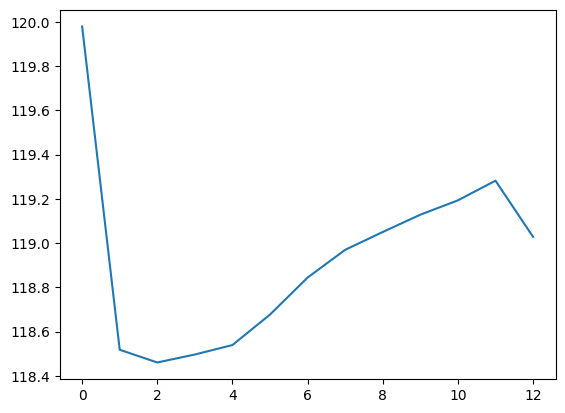

In [57]:
name = "experiment_1/M2_B_128_12/dry-water-374/final_chkpoint"
curve = get_curvature(name, val_data_B)
plt.plot(curve)

100%|██████████| 4000/4000 [00:37<00:00, 105.61it/s]
4000it [03:02, 21.87it/s]


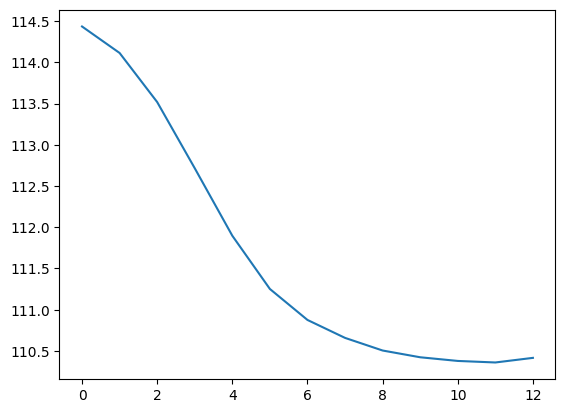

In [42]:
name = "experiment_2S_D/M1_128_12/polar-firefly-368/final_chkpoint"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:42<00:00, 38.96it/s]
4000it [05:21, 12.44it/s]


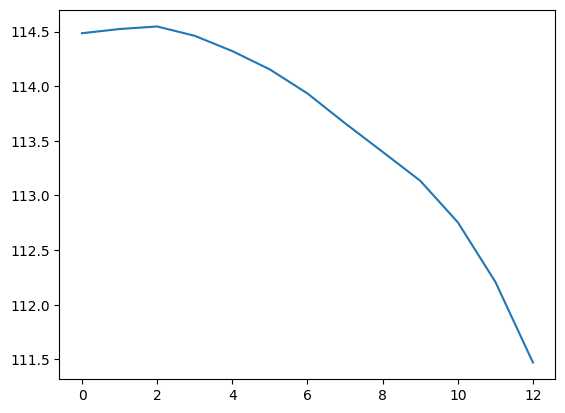

In [39]:
name = "experiment_2S_D/M2_128_12/clear-shadow-369/final_chkpoint"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:43<00:00, 38.74it/s]
4000it [05:30, 12.09it/s]


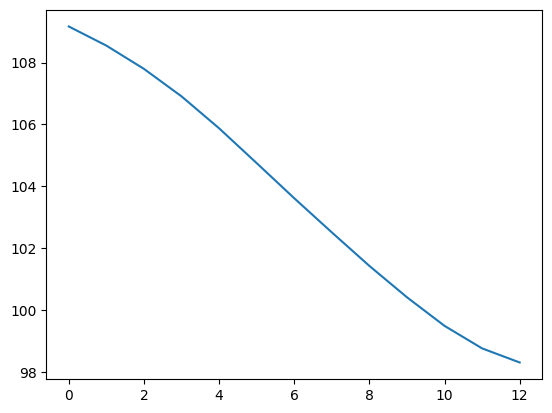

In [37]:
name = "experiment_2S_C/M1_128_12/splendid-star-366/epoch_120"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:42<00:00, 38.97it/s]
4000it [05:25, 12.28it/s]


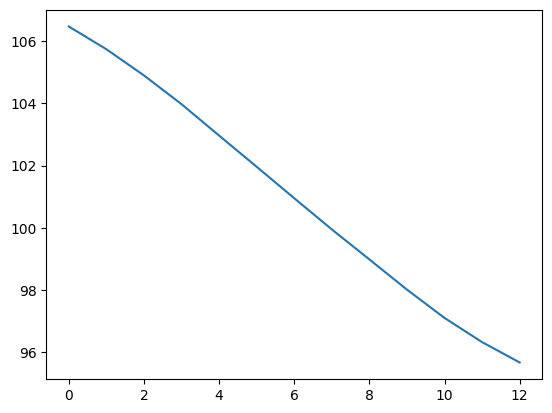

In [34]:
name = "experiment_2S_B/M1_128_12/avid-salad-365/epoch_120"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [02:04<00:00, 32.13it/s]
4000it [07:10,  9.29it/s]


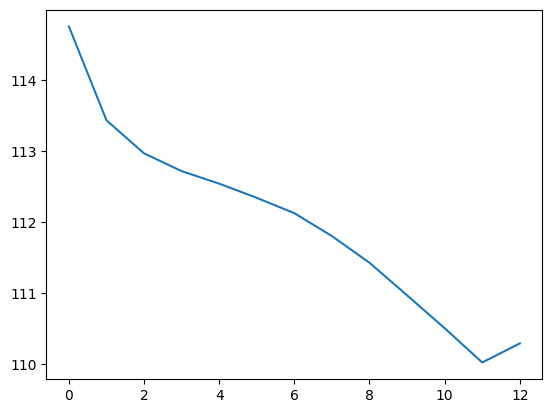

In [30]:
name = "experiment_2S_C/M2_128_12/wild-sound-364/epoch_200"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:57<00:00, 34.04it/s]
4000it [06:56,  9.61it/s]


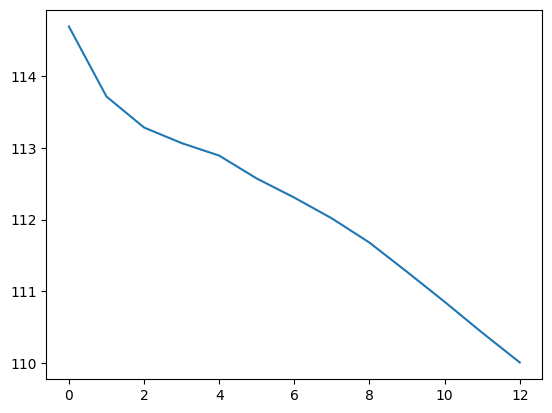

In [32]:
name = "experiment_2S_B/M2_128_12/wise-eon-363/epoch_200"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:42<00:00, 39.18it/s]
4000it [05:27, 12.22it/s]


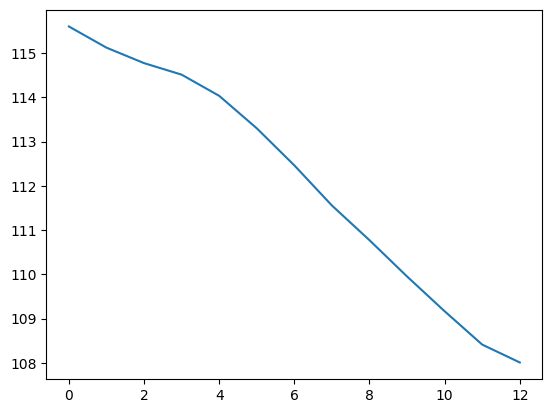

In [26]:
name = "experiment_2S_B/M2_128_12/swept-snowflake-361/final_chkpoint"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [00:36<00:00, 109.24it/s]
4000it [00:31, 127.50it/s]


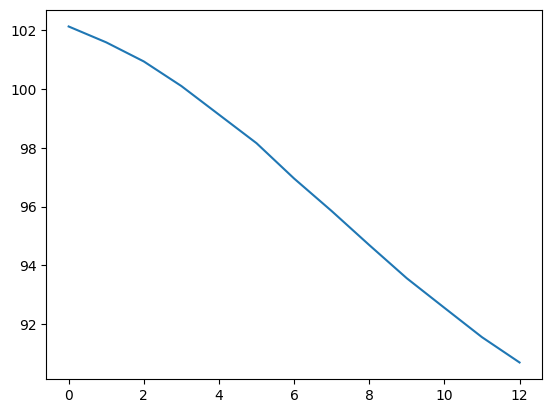

In [19]:
name = "experiment_2S_A/M1_128_12/sandy-flower-356/epoch_70"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [00:48<00:00, 81.82it/s] 
4000it [00:33, 118.11it/s]


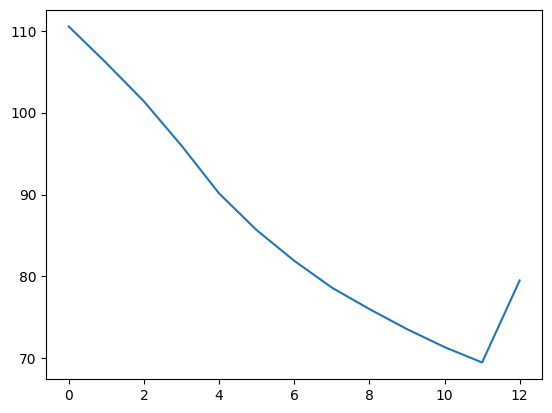

In [20]:
name = "experiment_2S_A/M2_128_12/neat-rain-355/epoch_30"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [00:42<00:00, 94.87it/s] 
4000it [03:04, 21.69it/s]


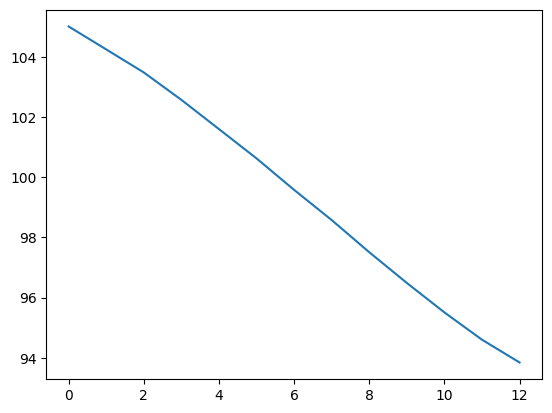

In [23]:
name = "experiment_2S_B/M1_128_12/trim-darkness-357/final_chkpoint"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [01:42<00:00, 39.04it/s]
4000it [05:25, 12.29it/s]


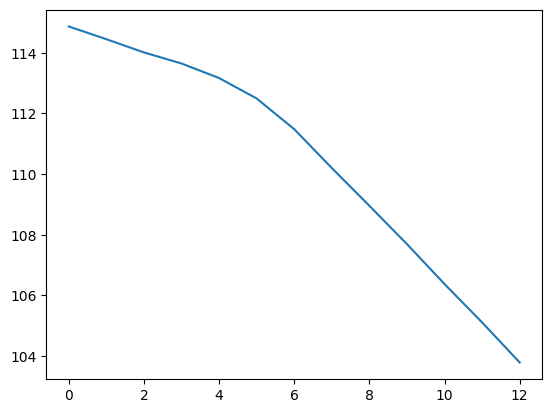

In [24]:
name = "experiment_2S_B/M2_128_12/crimson-spaceship-360/final_chkpoint"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 4000/4000 [00:36<00:00, 110.45it/s]
4000it [00:30, 129.32it/s]


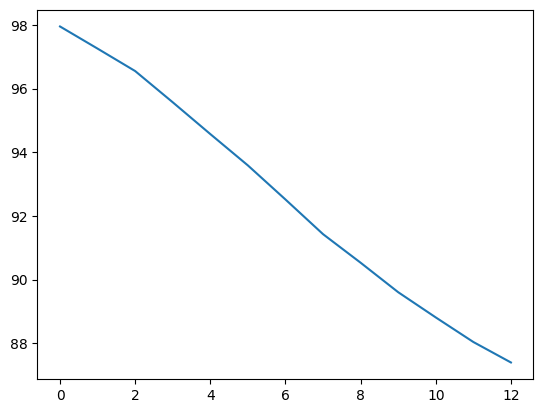

In [13]:
name = "experiment_2S/M1_128_12/silver-shape-349/epoch_60"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:30<00:00, 110.95it/s]
10000it [01:16, 130.77it/s]


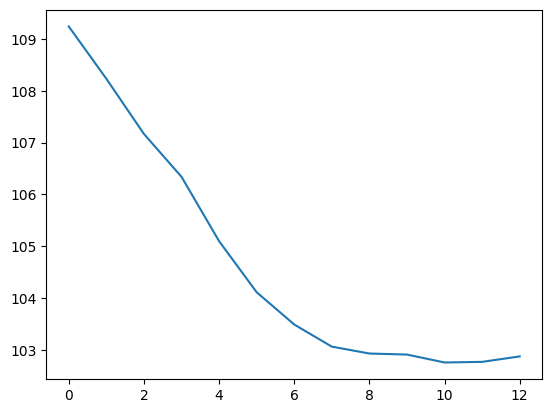

In [9]:
name = "experiment_1/M1_128_12/faithful-elevator-344/epoch_80"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

In [11]:
name = "experiment_2SD/M1_128_12/warm-armadillo-348/epoch_20"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

 60%|█████▉    | 5972/10000 [00:53<00:36, 111.50it/s]


KeyboardInterrupt: 

100%|██████████| 10000/10000 [01:31<00:00, 109.44it/s]
10000it [01:16, 130.32it/s]


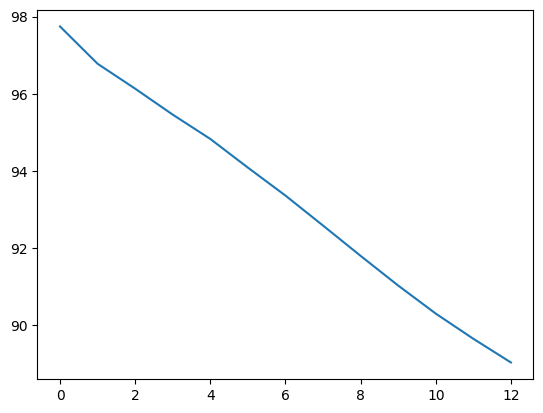

In [7]:
name = "experiment_2SD/M1_128_12/warm-armadillo-348/epoch_50"
curve = get_curvature(name, val_data["inputs"])
plt.plot(curve)

100%|██████████| 5000/5000 [00:57<00:00, 86.64it/s]
5000it [10:14,  8.14it/s]


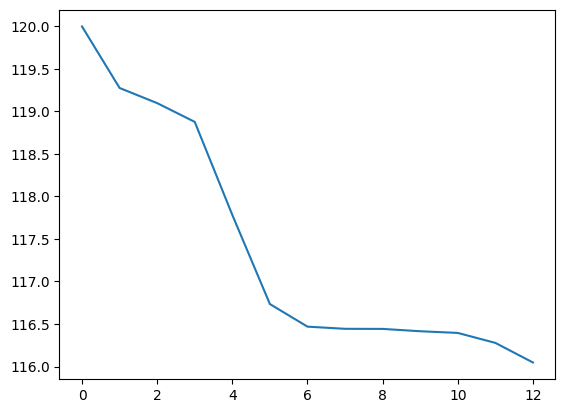

In [14]:
name = "experiment_1/M1_768_12/apricot-planet-345/epoch_40"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [02:35<00:00, 32.11it/s]
5000it [12:51,  6.48it/s]


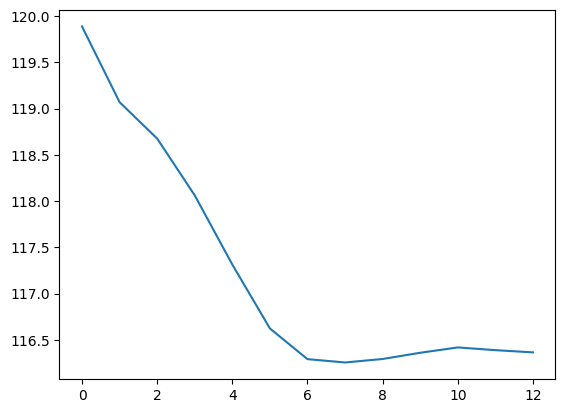

In [13]:
name = "experiment_1/M1_768_12/wobbly-salad-346/epoch_20"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [01:26<00:00, 57.70it/s]
5000it [04:05, 20.38it/s]


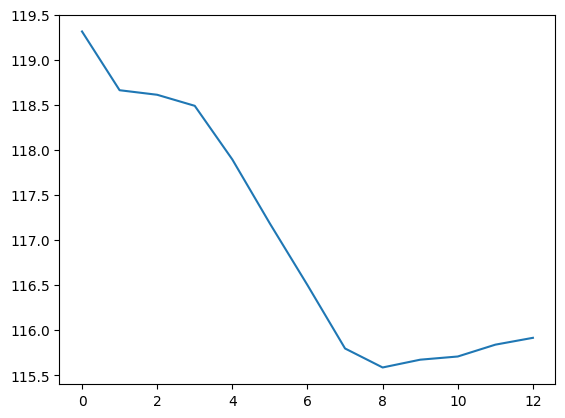

In [8]:

name = "experiment_1/M1_128_12/faithful-elevator-344/epoch_80"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [01:26<00:00, 57.73it/s]
5000it [03:56, 21.10it/s]


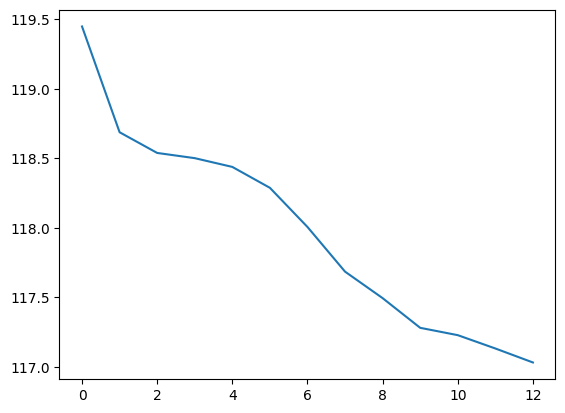

In [9]:
name = "longer_data/M1_128_12/treasured-jazz-333/epoch_90"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [00:37<00:00, 134.26it/s]
5000it [02:22, 35.07it/s]


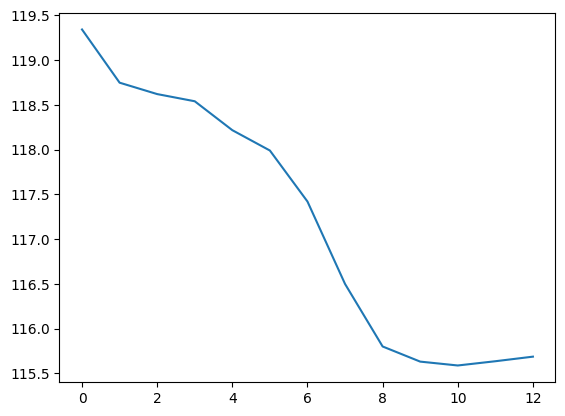

In [6]:
name = "experiment_1/M1_128_12/unique-rain-342/final_chkpoint"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [00:35<00:00, 139.83it/s]
5000it [00:59, 84.31it/s]


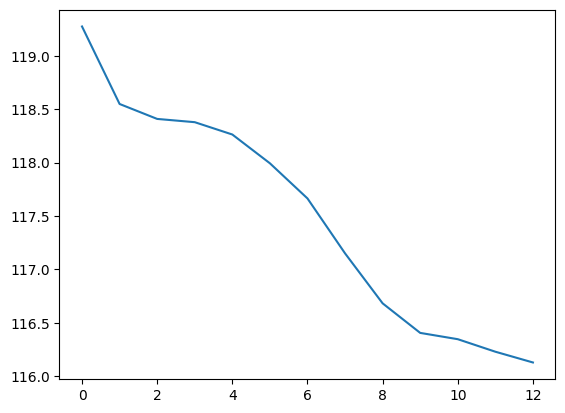

In [11]:
name = "longer_data/M1_128_12/lunar-vortex-339/epoch_90"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

  4%|▎         | 180/5000 [00:05<01:29, 53.69it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [01:38<00:00, 50.62it/s]
5000it [06:46, 12.30it/s]


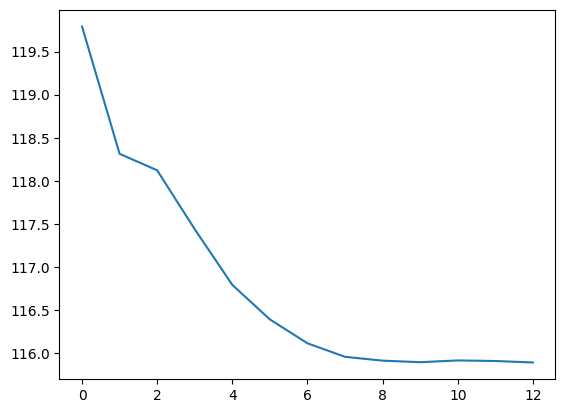

In [4]:
name = "longer_data/M1_768_12/azure-pine-341/epoch_20"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [00:41<00:00, 119.21it/s]
5000it [01:11, 69.45it/s]


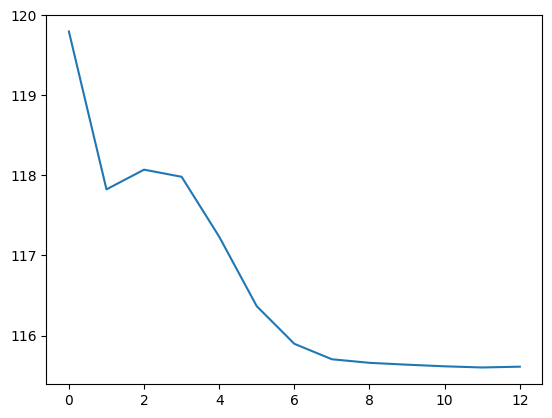

In [10]:
name = "longer_data/M1_768_12/decent-haze-334/epoch_10"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

  3%|▎         | 173/5000 [00:01<00:34, 139.02it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [00:35<00:00, 139.16it/s]
5000it [00:59, 84.37it/s]


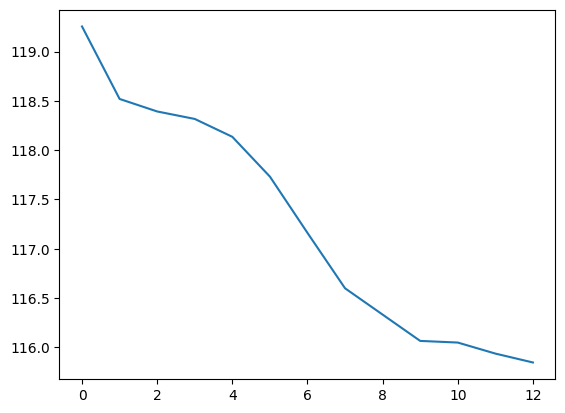

In [8]:
name = "longer_data/M1_128_12/treasured-jazz-333/epoch_90"
curve = get_curvature(name, val_data_A)
plt.plot(curve)

100%|██████████| 5000/5000 [00:42<00:00, 118.79it/s]
5000it [01:12, 68.93it/s]


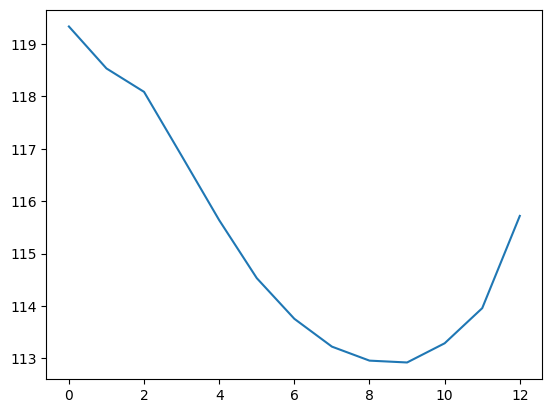

In [5]:
curve = get_curvature("gpt2", val_data_A)
plt.plot(curve)

100%|██████████| 10000/10000 [01:07<00:00, 148.55it/s]
10000it [00:28, 352.91it/s]
100%|██████████| 10000/10000 [01:06<00:00, 149.83it/s]
10000it [00:28, 348.46it/s]
100%|██████████| 10000/10000 [01:20<00:00, 123.77it/s]
10000it [00:30, 331.21it/s]


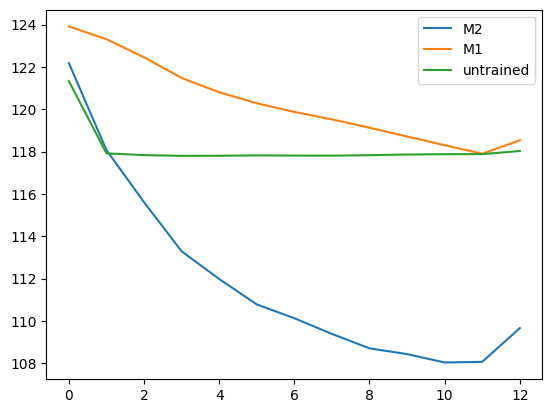

In [30]:
m2_name = "experiment_2D/M2_128_12/pious-vortex-326/final_chkpoint"
m2 = get_curvature(m2_name, val_data["inputs"])
plt.plot(m2, label="M2")

m1_name = "experiment_2D/M1_128_12/floral-water-325/final_chkpoint"
m1 = get_curvature(m1_name, val_data["inputs"])
plt.plot(m1, label="M1")

untrained = get_curvature("untrained", val_data["inputs"])
plt.plot(untrained, label="untrained")

plt.legend()
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:10<00:00, 141.88it/s]
10000it [00:52, 191.03it/s]
100%|██████████| 10000/10000 [01:26<00:00, 116.21it/s]
10000it [00:57, 174.05it/s]


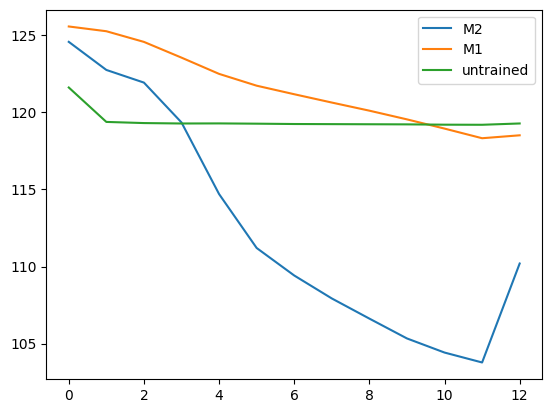

In [7]:
m2_name = "experiment_2_C/M2_128_12/valiant-firefly-322/epoch_36"
m2 = get_curvature(m2_name, val_data["inputs"])
plt.plot(m2, label="M2")

m1_name = "experiment_2C/M1_128_12/hardy-wood-321/final_chkpoint"
m1 = get_curvature(m1_name, val_data["inputs"])
plt.plot(m1, label="M1")

untrained = get_curvature("untrained", val_data["inputs"])
plt.plot(untrained, label="untrained")

plt.legend()
plt.show()

100%|██████████| 10000/10000 [03:19<00:00, 50.19it/s]
10000it [02:51, 58.46it/s]
100%|██████████| 10000/10000 [03:17<00:00, 50.56it/s]
10000it [02:50, 58.61it/s]
100%|██████████| 10000/10000 [03:45<00:00, 44.32it/s]
10000it [03:07, 53.25it/s]


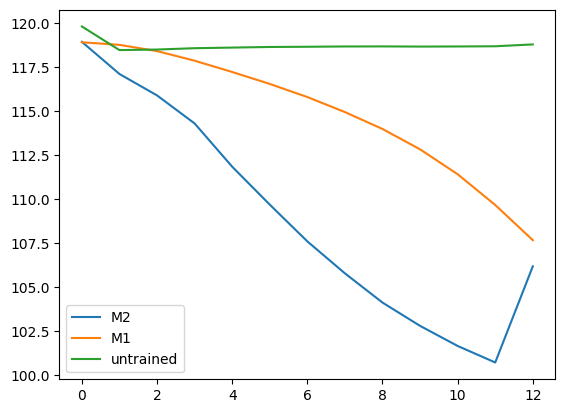

In [4]:
m2_name = "experiment_2_B/M2_128_12/rosy-wind-289/final_chkpoint"
m2 = get_curvature(m2_name, val_data["inputs"])
plt.plot(m2, label="M2")

m1_name = "experiment_2_B/M1_128_12/sparkling-sea-288/final_chkpoint"
m1 = get_curvature(m1_name, val_data["inputs"])
plt.plot(m1, label="M1")

untrained = get_curvature("untrained", val_data["inputs"])
plt.plot(untrained, label="untrained")

plt.legend()
plt.show()

100%|██████████| 10000/10000 [01:14<00:00, 134.50it/s]
10000it [00:50, 197.03it/s]
100%|██████████| 10000/10000 [01:10<00:00, 140.91it/s]
10000it [00:50, 198.59it/s]
100%|██████████| 10000/10000 [01:24<00:00, 118.16it/s]
10000it [00:54, 182.55it/s]


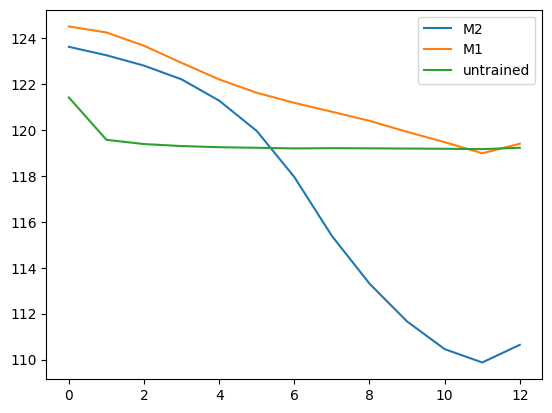

In [4]:
m2_name = "experiment_2/M2_64_12/stellar-water-246/final_chkpoint"
m2 = get_curvature(m2_name, val_data["inputs"])
plt.plot(m2, label="M2")

m1_name = "experiment_2/M1_128_12/zany-snow-249/final_chkpoint"
m1 = get_curvature(m1_name, val_data["inputs"])
plt.plot(m1, label="M1")

untrained = get_curvature("untrained", val_data["inputs"])
plt.plot(untrained, label="untrained")

plt.legend()
plt.show()

## Experiment 1 - Longer Data

In [7]:
m3_F_name = "longer_data/M3_F_128_12/devoted-dragon-292/final_chkpoint"
m3_F_onF = get_curvature(m3_F_name, val_data_F)


  1%|          | 57/5000 [00:02<01:31, 54.15it/s] We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [00:37<00:00, 131.61it/s]
5000it [02:10, 38.19it/s]


In [ ]:
m3_F_name = "experiment_1/M3_F_128_12/devoted-dragon-292/final_chkpoint"
m3_F_onF = get_curvature(m3_F_name, val_data_F)


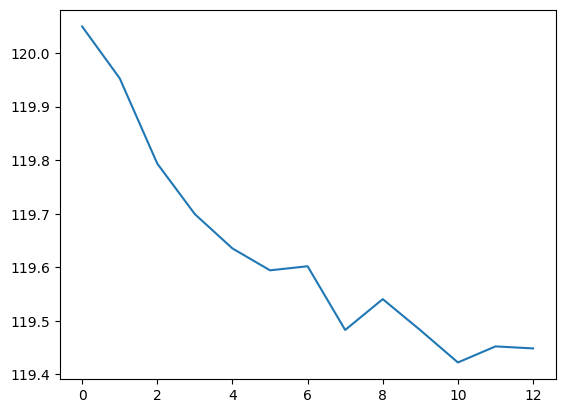

In [8]:
plt.plot(m3_F_onF)

In [18]:

m1_name = "longer_data/M1_128_12/woven-voice-167/final_chkpoint"

m2_B_name = "longer_data/M2_128_12/trim-frog-171/final_chkpoint"
m3_B_name = "longer_data/M3_128_12/swift-plasma-176/final_chkpoint"

m2_T_name = "longer_data/M2_128_12/avid-leaf-253/final_chkpoint"
m3_T_name = "longer_data/M3_T_128_12/dainty-plasma-272/epoch_200"

m2_F_name = "longer_data/M2_F_128_12/ruby-music-280/final_chkpoint"
m3_F_name = "longer_data/M3_F_128_12/devoted-dragon-292/final_chkpoint"


# m1_onA = get_curvature(m1_name, val_data_A)
# m2_B_onA = get_curvature(m2_B_name, val_data_A)
# m3_B_onA = get_curvature(m3_B_name, val_data_A)
# m2_T_onA = get_curvature(m2_T_name, val_data_A)
# m3_T_onA = get_curvature(m3_T_name, val_data_A)
m2_F_onA = get_curvature(m2_F_name, val_data_A)
m3_F_onA = get_curvature(m3_F_name, val_data_A)
# untrained_onA = get_curvature("untrained", val_data_A)

# m1_onB = get_curvature(m1_name, val_data_B)
# m2_B_onB = get_curvature(m2_B_name, val_data_B)
# m3_B_onB = get_curvature(m3_B_name, val_data_B)
# untrained_onB = get_curvature("untrained", val_data_B)

# m1_onT = get_curvature(m1_name, val_data_T)
# m2_T_onT = get_curvature(m2_T_name, val_data_T)
# m3_T_onT = get_curvature(m3_T_name, val_data_T)
# untrained_onT = get_curvature("untrained", val_data_T)

m1_onF = get_curvature(m1_name, val_data_F)
m2_F_onF = get_curvature(m2_F_name, val_data_F)
m3_F_onF = get_curvature(m3_F_name, val_data_F)
untrained_onF = get_curvature("untrained", val_data_F)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:35<00:00, 140.33it/s]
5000it [01:00, 82.97it/s]
100%|██████████| 5000/5000 [00:36<00:00, 138.43it/s]
5000it [01:00, 82.57it/s]
100%|██████████| 5000/5000 [00:35<00:00, 139.85it/s]
5000it [01:00, 82.57it/s]
100%|██████████| 5000/5000 [00:35<00:00, 139.73it/s]
5000it [01:00, 82.67it/s]
100%|██████████| 5000/5000 [00:36<00:00, 138.53it/s]
5000it [01:00, 82.85it/s]
100%|██████████| 5000/5000 [00:45<00:00, 110.57it/s]
5000it [01:13, 68.24it/s]


100%|██████████| 5000/5000 [01:11<00:00, 69.61it/s]
5000it [01:04, 77.18it/s]


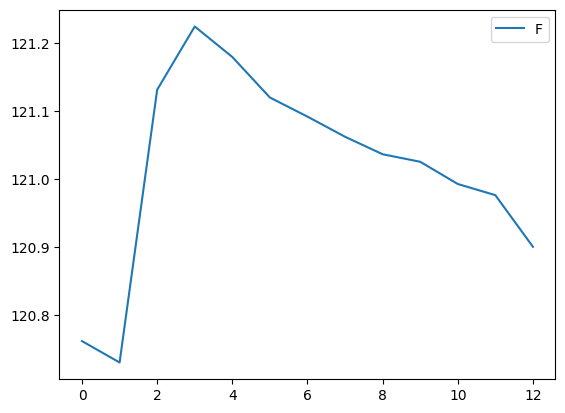

In [46]:
name = "shorter_data/M2_T_128_12/daily-aardvark-328/epoch_0"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

  7%|▋         | 337/5000 [00:06<01:19, 58.46it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
100%|██████████| 5000/5000 [01:27<00:00, 57.34it/s]
5000it [02:34, 32.37it/s]


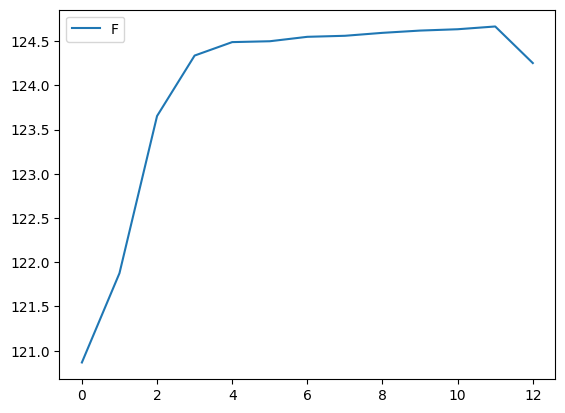

100%|██████████| 5000/5000 [01:25<00:00, 58.61it/s]
5000it [02:34, 32.37it/s]


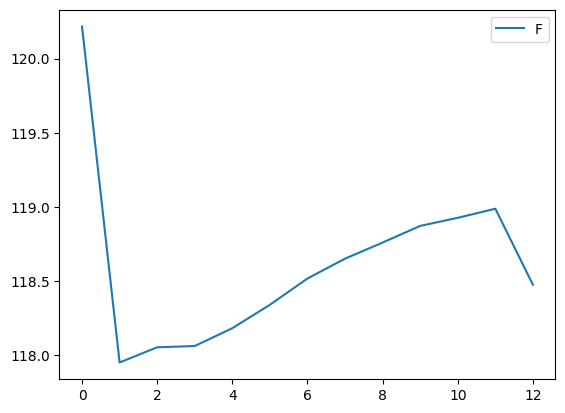

In [4]:
name = "longer_data/M2_B_128_12/exalted-surf-329/epoch_0"
curve1 = get_curvature(name, val_data_B)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


name = "longer_data/M2_B_128_12/exalted-surf-329/final_chkpoint"
curve1 = get_curvature(name, val_data_B)
plt.plot(curve1, label="F")
plt.legend()


100%|██████████| 5000/5000 [01:11<00:00, 70.27it/s] 
5000it [02:11, 37.99it/s]


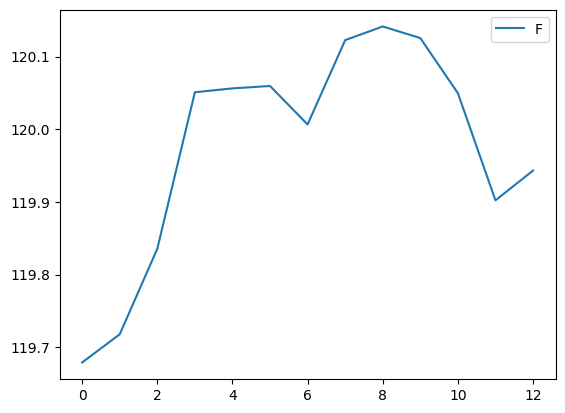

  3%|▎         | 168/5000 [00:03<01:33, 51.48it/s]


IndexError: too many indices for tensor of dimension 1

In [5]:
name = "longer_data/M3_B_128_12/expert-river-331/epoch_0"
curve1 = get_curvature(name, val_data_B)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


name = "longer_data/M3_B_128_12/expert-river-331/epoch_48"
curve1 = get_curvature(name, val_data_B)
plt.plot(curve1, label="F")
plt.legend()


100%|██████████| 5000/5000 [01:28<00:00, 56.58it/s]
5000it [02:11, 38.05it/s]


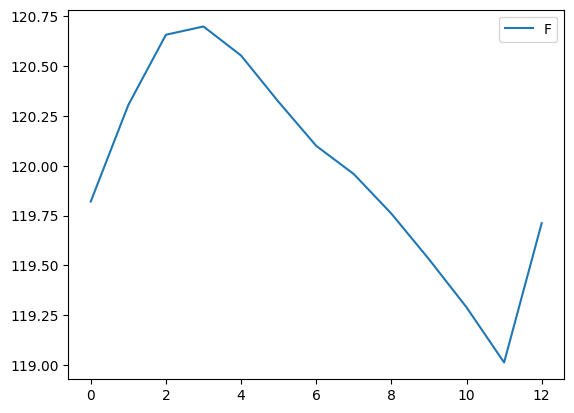

In [6]:
name = "longer_data/M3_B_128_12/expert-river-331/final_chkpoint"
curve1 = get_curvature(name, val_data_B)
plt.plot(curve1, label="F")
plt.legend()

100%|██████████| 5000/5000 [01:28<00:00, 56.75it/s]
5000it [02:11, 37.91it/s]


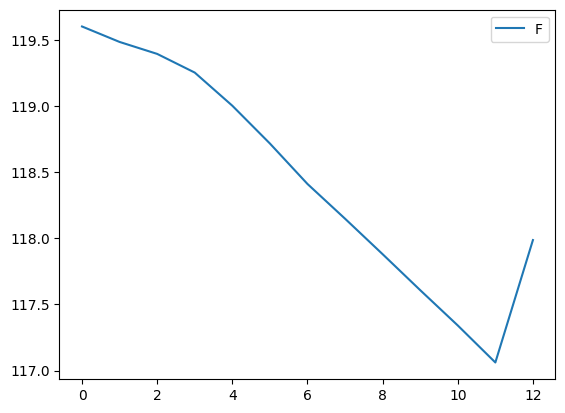

In [8]:

name = "longer_data/M3_B_128_12/expert-river-331/final_chkpoint"
curve1 = get_curvature(name, val_data_A)
plt.plot(curve1, label="F")
plt.legend()


  0%|          | 13/5000 [00:00<00:39, 126.16it/s]

100%|██████████| 5000/5000 [00:38<00:00, 128.68it/s]
5000it [01:02, 80.47it/s]


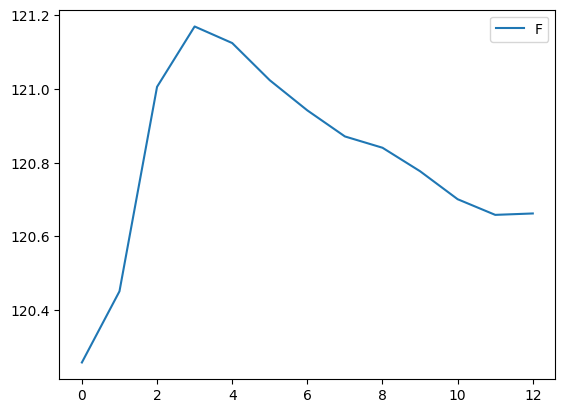

100%|██████████| 5000/5000 [01:12<00:00, 69.39it/s]
5000it [01:04, 77.28it/s]


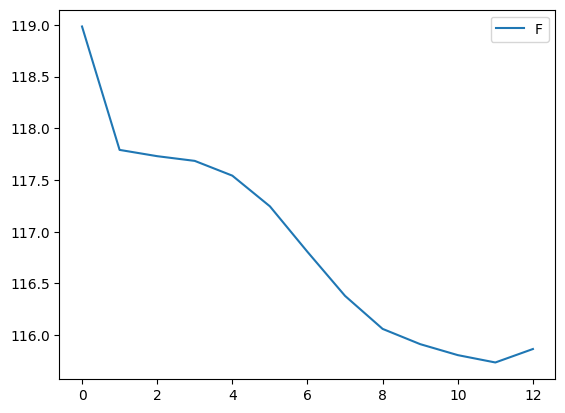

In [45]:
name = "shorter_data/M2_T_128_12/hearty-wind-301/epoch_0"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


name = "shorter_data/M2_T_128_12/hearty-wind-301/final_chkpoint"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


In [ ]:
name = "shorter_data/M2_T_128_12/daily-aardvark-328/epoch_0"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


name = "shorter_data/M2_T_128_12/daily-aardvark-328/epoch_48"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

100%|██████████| 5000/5000 [01:11<00:00, 69.61it/s]
5000it [01:04, 77.33it/s]


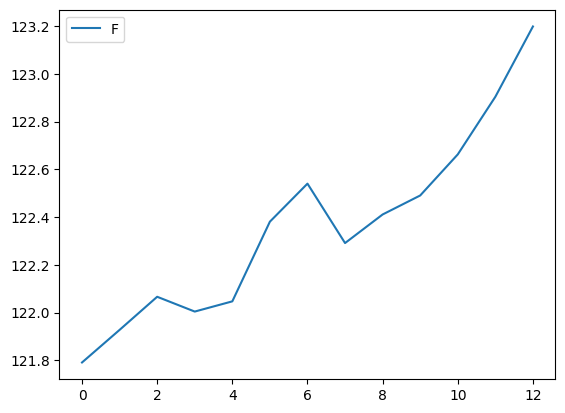

100%|██████████| 5000/5000 [01:12<00:00, 68.88it/s]
5000it [01:04, 77.47it/s]


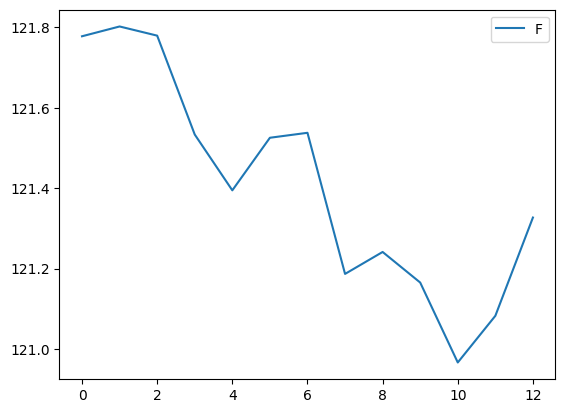

100%|██████████| 5000/5000 [01:11<00:00, 69.66it/s]
5000it [01:04, 77.45it/s]


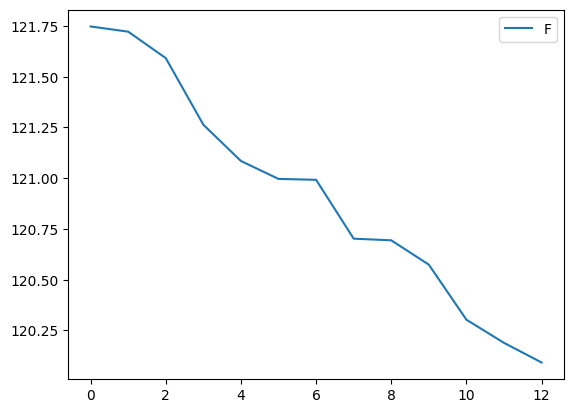

In [47]:
name = "shorter_data/M3_T_128_12/dashing-tree-307/epoch_0"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

name = "shorter_data/M3_T_128_12/dashing-tree-307/epoch_20"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

name = "shorter_data/M3_T_128_12/dashing-tree-307/final_chkpoint"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


100%|██████████| 5000/5000 [01:12<00:00, 69.28it/s]
5000it [01:06, 75.40it/s]


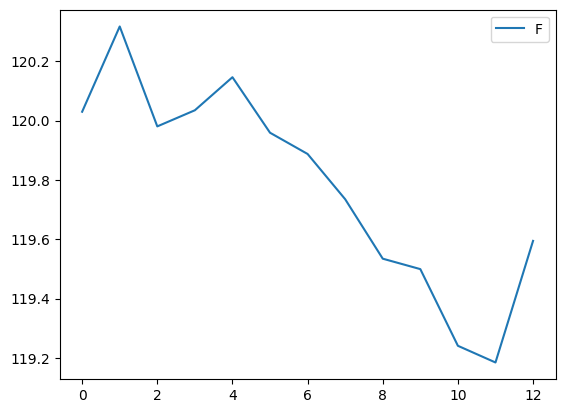

100%|██████████| 5000/5000 [01:12<00:00, 68.79it/s]
5000it [01:04, 77.10it/s]


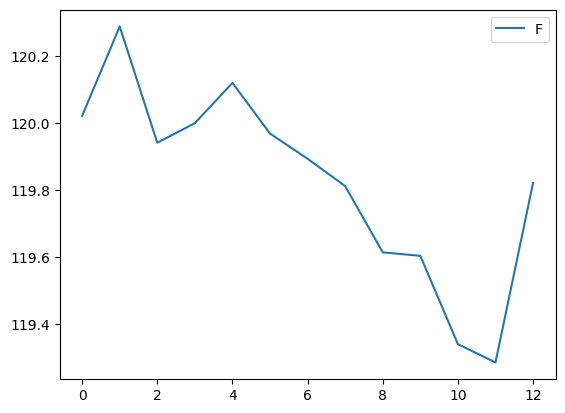

100%|██████████| 5000/5000 [01:11<00:00, 69.72it/s]
5000it [00:47, 104.65it/s]


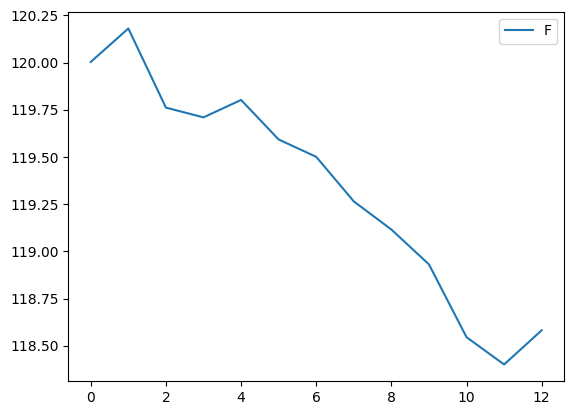

In [44]:
name = "shorter_data/M3_T_128_12/rural-surf-310/epoch_0"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

name = "shorter_data/M3_T_128_12/rural-surf-310/epoch_10"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()

name = "shorter_data/M3_T_128_12/rural-surf-310/final_chkpoint"
curve1 = get_curvature(name, val_data_T)
plt.plot(curve1, label="F")

plt.legend()
plt.show()


100%|██████████| 3750/3750 [00:55<00:00, 67.45it/s]
3750it [01:55, 32.34it/s]


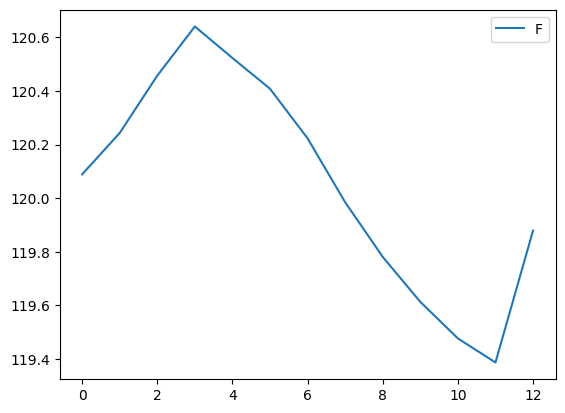

100%|██████████| 3750/3750 [00:55<00:00, 67.21it/s]
3750it [01:55, 32.37it/s]


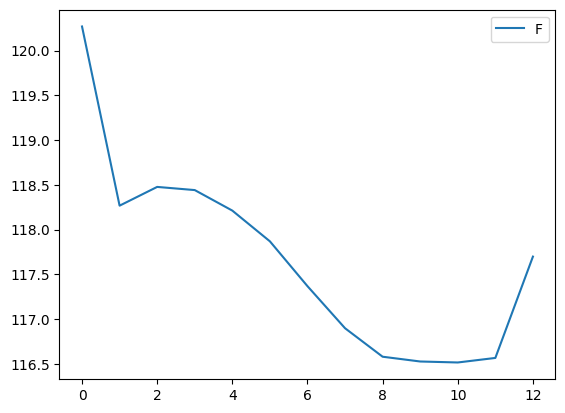

100%|██████████| 3750/3750 [00:55<00:00, 67.38it/s]
3750it [01:55, 32.48it/s]


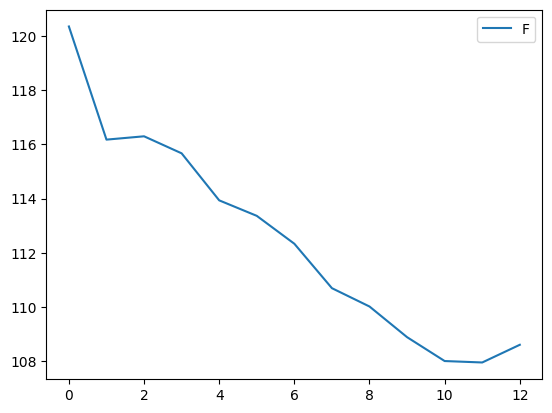

In [51]:

name = "longer_data/M3_128_12/clear-energy-174/epoch_0"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "longer_data/M3_128_12/clear-energy-174/epoch_40"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "longer_data/M3_128_12/clear-energy-174/final_chkpoint"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()


100%|██████████| 3750/3750 [00:55<00:00, 67.80it/s]
3750it [01:55, 32.36it/s]


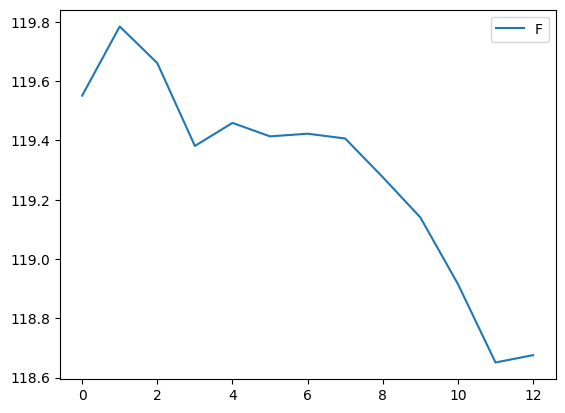

100%|██████████| 3750/3750 [00:56<00:00, 66.64it/s]
3750it [01:58, 31.57it/s]


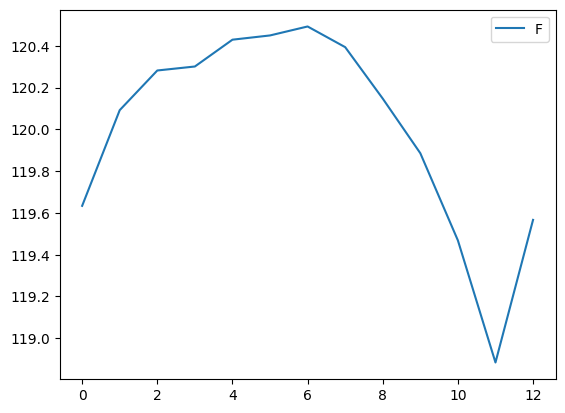

100%|██████████| 3750/3750 [00:55<00:00, 67.27it/s]
3750it [01:55, 32.33it/s]


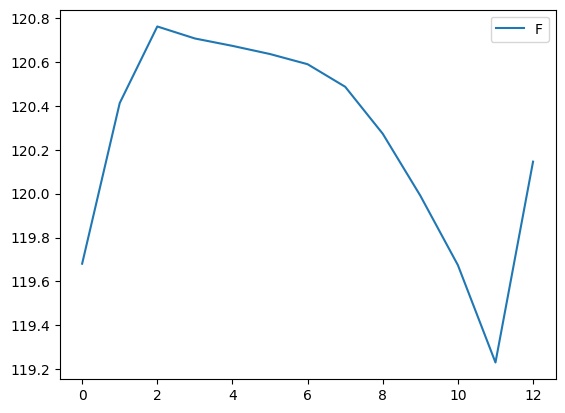

In [52]:

name = "longer_data/M3_128_12/swift-plasma-176/epoch_0"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "longer_data/M3_128_12/swift-plasma-176/epoch_40"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "longer_data/M3_128_12/swift-plasma-176/final_chkpoint"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()


100%|██████████| 5000/5000 [01:11<00:00, 69.89it/s]
5000it [01:04, 77.53it/s]


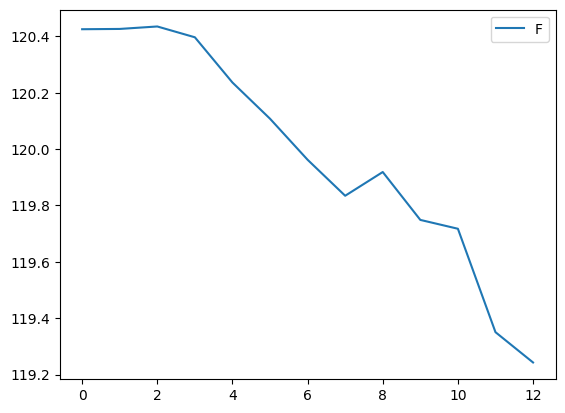

100%|██████████| 5000/5000 [01:12<00:00, 69.03it/s]
5000it [01:04, 77.33it/s]


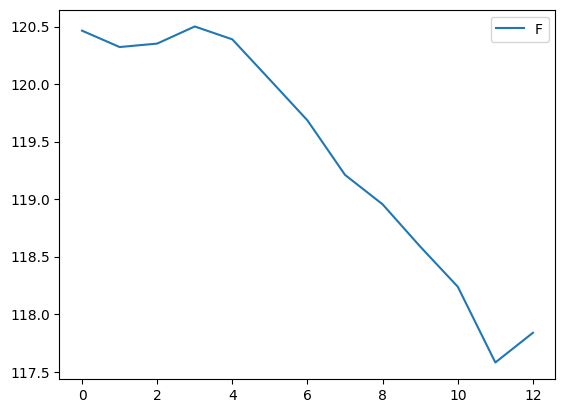

100%|██████████| 5000/5000 [01:11<00:00, 69.74it/s]
5000it [01:04, 77.28it/s]


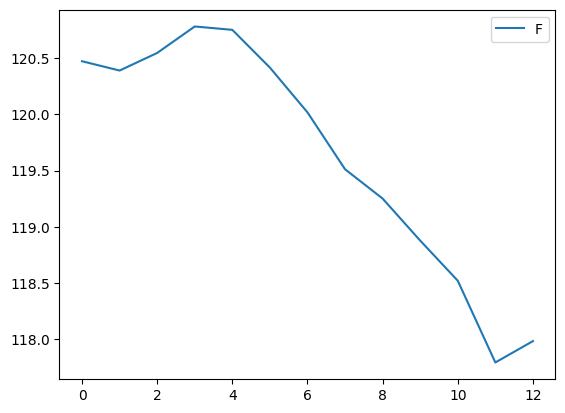

In [49]:

name = "shorter_data/M3_128_12/stellar-snowball-312/epoch_0"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_128_12/stellar-snowball-312/epoch_25"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_128_12/stellar-snowball-312/final_chkpoint"
curve1 = get_curvature(name, val_data_B)

plt.plot(curve1, label="F")
plt.legend()
plt.show()


100%|██████████| 5000/5000 [01:11<00:00, 69.52it/s]
5000it [01:04, 77.01it/s]


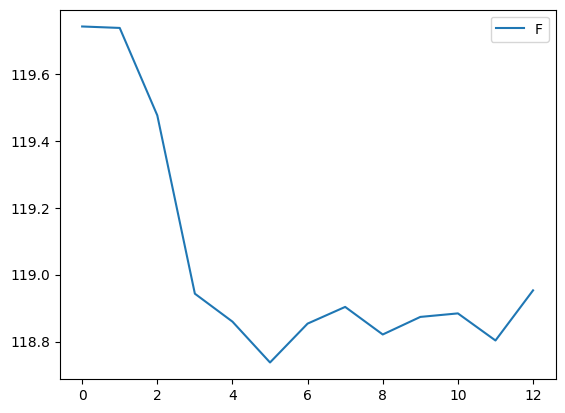

100%|██████████| 5000/5000 [01:12<00:00, 68.92it/s]
5000it [01:04, 77.29it/s]


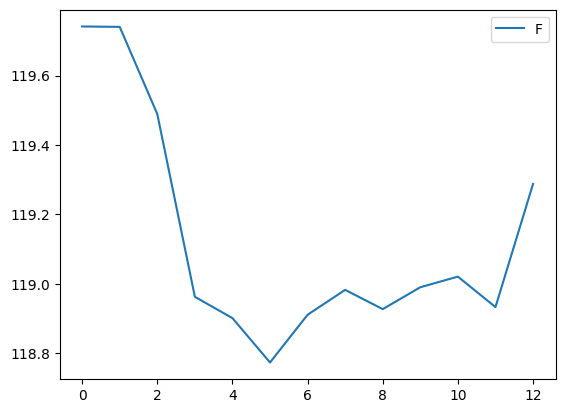

100%|██████████| 5000/5000 [01:11<00:00, 69.71it/s]
5000it [01:04, 77.10it/s]


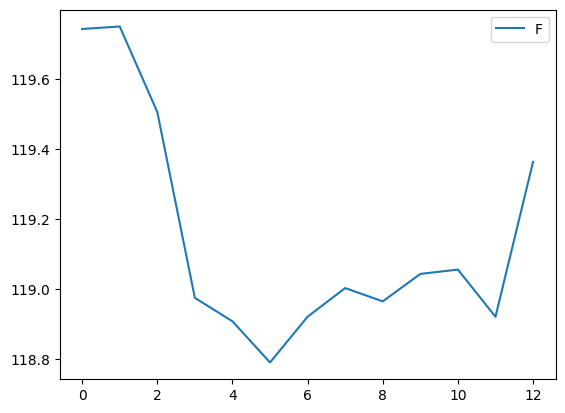

In [48]:

name = "shorter_data/M3_F_128_12/distinctive-totem-318/epoch_0"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_F_128_12/distinctive-totem-318/epoch_5"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_F_128_12/distinctive-totem-318/epoch_25"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:34<00:00, 146.71it/s]
5000it [00:25, 196.92it/s]
100%|██████████| 5000/5000 [00:34<00:00, 146.24it/s]
5000it [00:25, 196.19it/s]


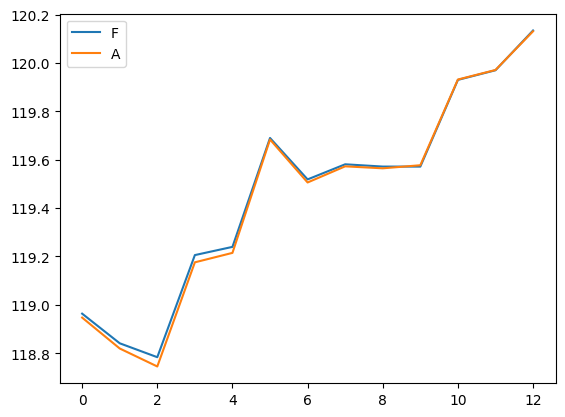

100%|██████████| 5000/5000 [00:34<00:00, 144.31it/s]
5000it [00:25, 196.96it/s]
100%|██████████| 5000/5000 [00:34<00:00, 146.51it/s]
5000it [00:25, 197.05it/s]


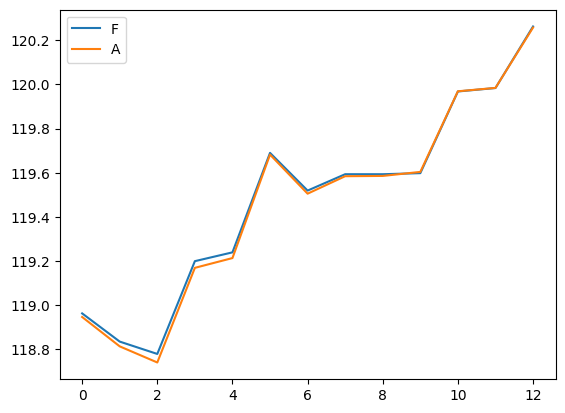

100%|██████████| 5000/5000 [00:34<00:00, 146.56it/s]
5000it [00:25, 196.10it/s]


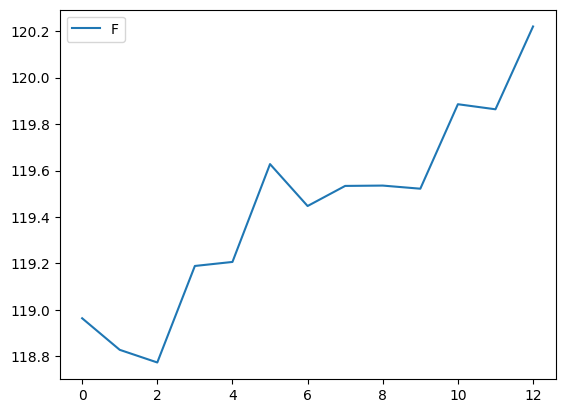

In [40]:
name = "shorter_data/M3_F_128_12/summer-music-317/epoch_0"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_F_128_12/summer-music-317/epoch_5"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()

name = "shorter_data/M3_F_128_12/summer-music-317/epoch_25"
curve1 = get_curvature(name, val_data_F)

plt.plot(curve1, label="F")
plt.legend()
plt.show()


100%|██████████| 5000/5000 [00:34<00:00, 146.39it/s]
5000it [00:25, 197.66it/s]
100%|██████████| 5000/5000 [00:34<00:00, 144.68it/s]
5000it [00:25, 197.60it/s]


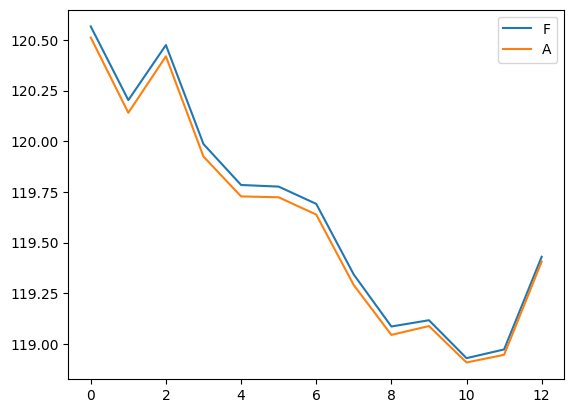

In [38]:
name = "shorter_data/M3_T_128_12/zany-surf-316/epoch_0"
curve1 = get_curvature(name, val_data_T)
curve2 = get_curvature(name, val_data_A)

plt.plot(curve1, label="F")
plt.plot(curve2, label="A")
plt.legend()

100%|██████████| 5000/5000 [00:34<00:00, 145.25it/s]
5000it [00:25, 197.29it/s]
100%|██████████| 5000/5000 [00:34<00:00, 146.36it/s]
5000it [00:25, 197.50it/s]


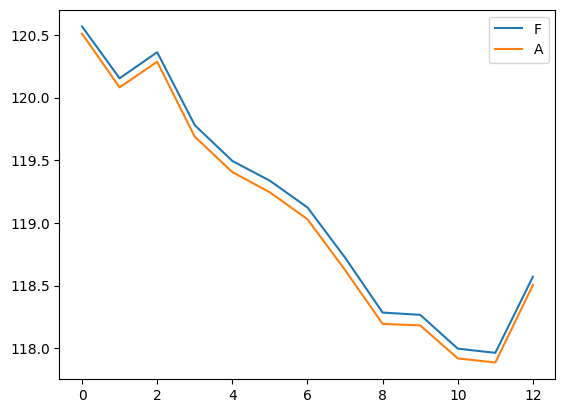

In [37]:
name = "shorter_data/M3_T_128_12/zany-surf-316/epoch_2"
curve1 = get_curvature(name, val_data_T)
curve2 = get_curvature(name, val_data_A)

plt.plot(curve1, label="F")
plt.plot(curve2, label="A")
plt.legend()

100%|██████████| 5000/5000 [00:34<00:00, 146.29it/s]
5000it [00:25, 197.57it/s]
100%|██████████| 5000/5000 [00:34<00:00, 146.61it/s]
5000it [00:25, 197.26it/s]


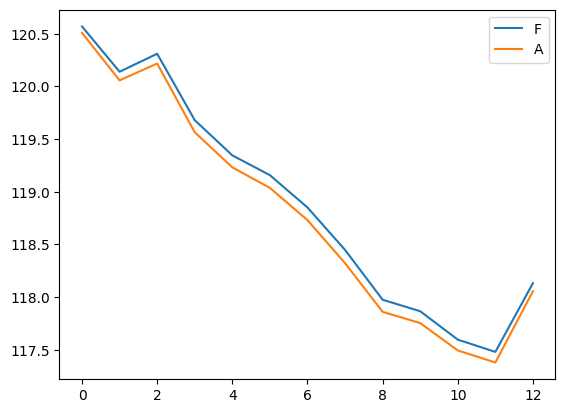

100%|██████████| 5000/5000 [00:34<00:00, 144.78it/s]
5000it [00:25, 197.45it/s]
100%|██████████| 5000/5000 [00:34<00:00, 146.39it/s]
5000it [00:25, 197.54it/s]


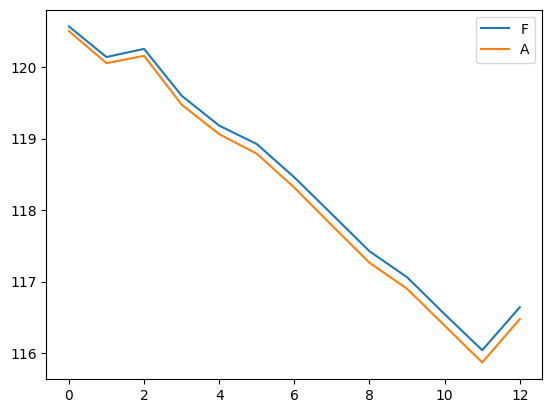

In [36]:
name = "shorter_data/M3_T_128_12/zany-surf-316/epoch_4"
curve1 = get_curvature(name, val_data_T)
curve2 = get_curvature(name, val_data_A)

plt.plot(curve1, label="F")
plt.plot(curve2, label="A")
plt.legend()
plt.show()

name = "shorter_data/M3_T_128_12/zany-surf-316/final_chkpoint"
curve1 = get_curvature(name, val_data_T)
curve2 = get_curvature(name, val_data_A)

plt.plot(curve1, label="F")
plt.plot(curve2, label="A")
plt.legend()
plt.show()

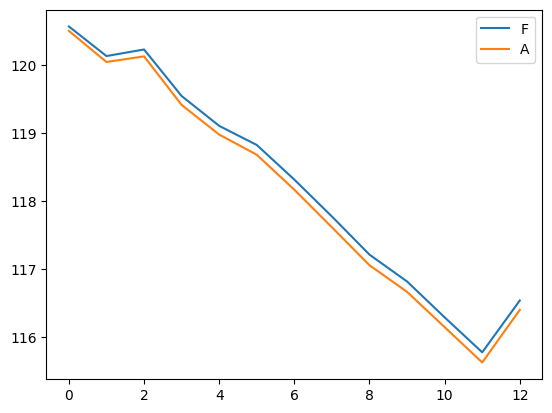

In [35]:
plt.plot(curve1, label="F")
plt.plot(curve2, label="A")
plt.legend()
plt.show()

In [8]:
#save
curvatures = {
    "m1_onA": m1_onA,
    "m2_B_onA": m2_B_onA,
    "m3_B_onA": m3_B_onA,
    "m2_T_onA": m2_T_onA,
    "m3_T_onA": m3_T_onA,
    "m2_F_onA": m2_F_onA,
    "m3_F_onA": m3_F_onA,
    "untrained_onA": untrained_onA,
    "m1_onB": m1_onB,
    "m2_B_onB": m2_B_onB,
    "m3_B_onB": m3_B_onB,
    "untrained_onB": untrained_onB,
    "m1_onT": m1_onT,
    "m2_T_onT": m2_T_onT,
    "m3_T_onT": m3_T_onT,
    "untrained_onT": untrained_onT,
    "m1_onF": m1_onF,
    "m2_F_onF": m2_F_onF,
    "m3_F_onF": m3_F_onF,
    "untrained_onF": untrained_onF
}

with open(f"{path}/longer_data/curvatures.pkl", "wb") as f:
    pickle.dump(curvatures, f)

In [7]:
curvatures = pickle.load(open(f"{path}/longer_data/curvatures.pkl", "rb"))
m1_onA = curvatures["m1_onA"]
m2_B_onA = curvatures["m2_B_onA"]
m3_B_onA = curvatures["m3_B_onA"]
m2_T_onA = curvatures["m2_T_onA"]
m3_T_onA = curvatures["m3_T_onA"]
m2_F_onA = curvatures["m2_F_onA"]
m3_F_onA = curvatures["m3_F_onA"]
untrained_onA = curvatures["untrained_onA"]
m1_onB = curvatures["m1_onB"]
m2_B_onB = curvatures["m2_B_onB"]
m3_B_onB = curvatures["m3_B_onB"]
untrained_onB = curvatures["untrained_onB"]
m1_onT = curvatures["m1_onT"]
m2_T_onT = curvatures["m2_T_onT"]
m3_T_onT = curvatures["m3_T_onT"]
untrained_onT = curvatures["untrained_onT"]
m1_onF = curvatures["m1_onF"]
m2_F_onF = curvatures["m2_F_onF"]
m3_F_onF = curvatures["m3_F_onF"]
untrained_onF = curvatures["untrained_onF"]

In [ ]:
#plot a grid with m1, m2, m3, untrained on y and A, B, T, F on x

m3_B_onA

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Curvature of models on different data')
axs[0, 0].plot(m1_onA)
axs[0, 0].set_title('M1 on A')
axs[0, 1].plot(m1_onB)
axs[0, 1].set_title('M1 on B')
axs[0, 2].plot(m1_onT)
axs[0, 2].set_title('M1 on T')
axs[0, 3].plot(m1_onF)
axs[0, 3].set_title('M1 on F')

axs[1, 0].plot(m2_B_onA, label="M2_B")
axs[1, 0].plot(m2_T_onA, label="M2_T")
axs[1, 0].plot(m2_F_onA, label="M2_F")
axs[1, 0].set_title('M2s on A')
axs[1, 0].legend()

axs[1, 1].plot(m2_B_onB)
axs[1, 1].set_title('M2_B on B')
axs[1, 2].plot(m2_T_onT)
axs[1, 2].set_title('M2_T on T')
axs[1, 3].plot(m2_F_onF)
axs[1, 3].set_title('M2_F on F')

axs[2, 0].plot(m3_B_onA, label="M3_B")
axs[2, 0].plot(m3_T_onA, label="M3_T")
axs[2, 0].plot(m3_F_onA, label="M3_F")
axs[2, 0].set_title('M3s on A')
axs[2, 0].legend()

axs[2, 1].plot(m3_B_onB)
axs[2, 1].set_title('M3_B on B')
axs[2, 2].plot(m3_T_onT)
axs[2, 2].set_title('M3_T on T')
axs[2, 3].plot(m3_F_onF)
axs[2, 3].set_title('M3_F on F')

axs[3, 0].plot(untrained_onA)
axs[3, 0].set_title('Untrained on A')
axs[3, 1].plot(untrained_onB)
axs[3, 1].set_title('Untrained on B')
axs[3, 2].plot(untrained_onT)
axs[3, 2].set_title('Untrained on T')
axs[3, 3].plot(untrained_onF)
axs[3, 3].set_title('Untrained on F')

#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.show()



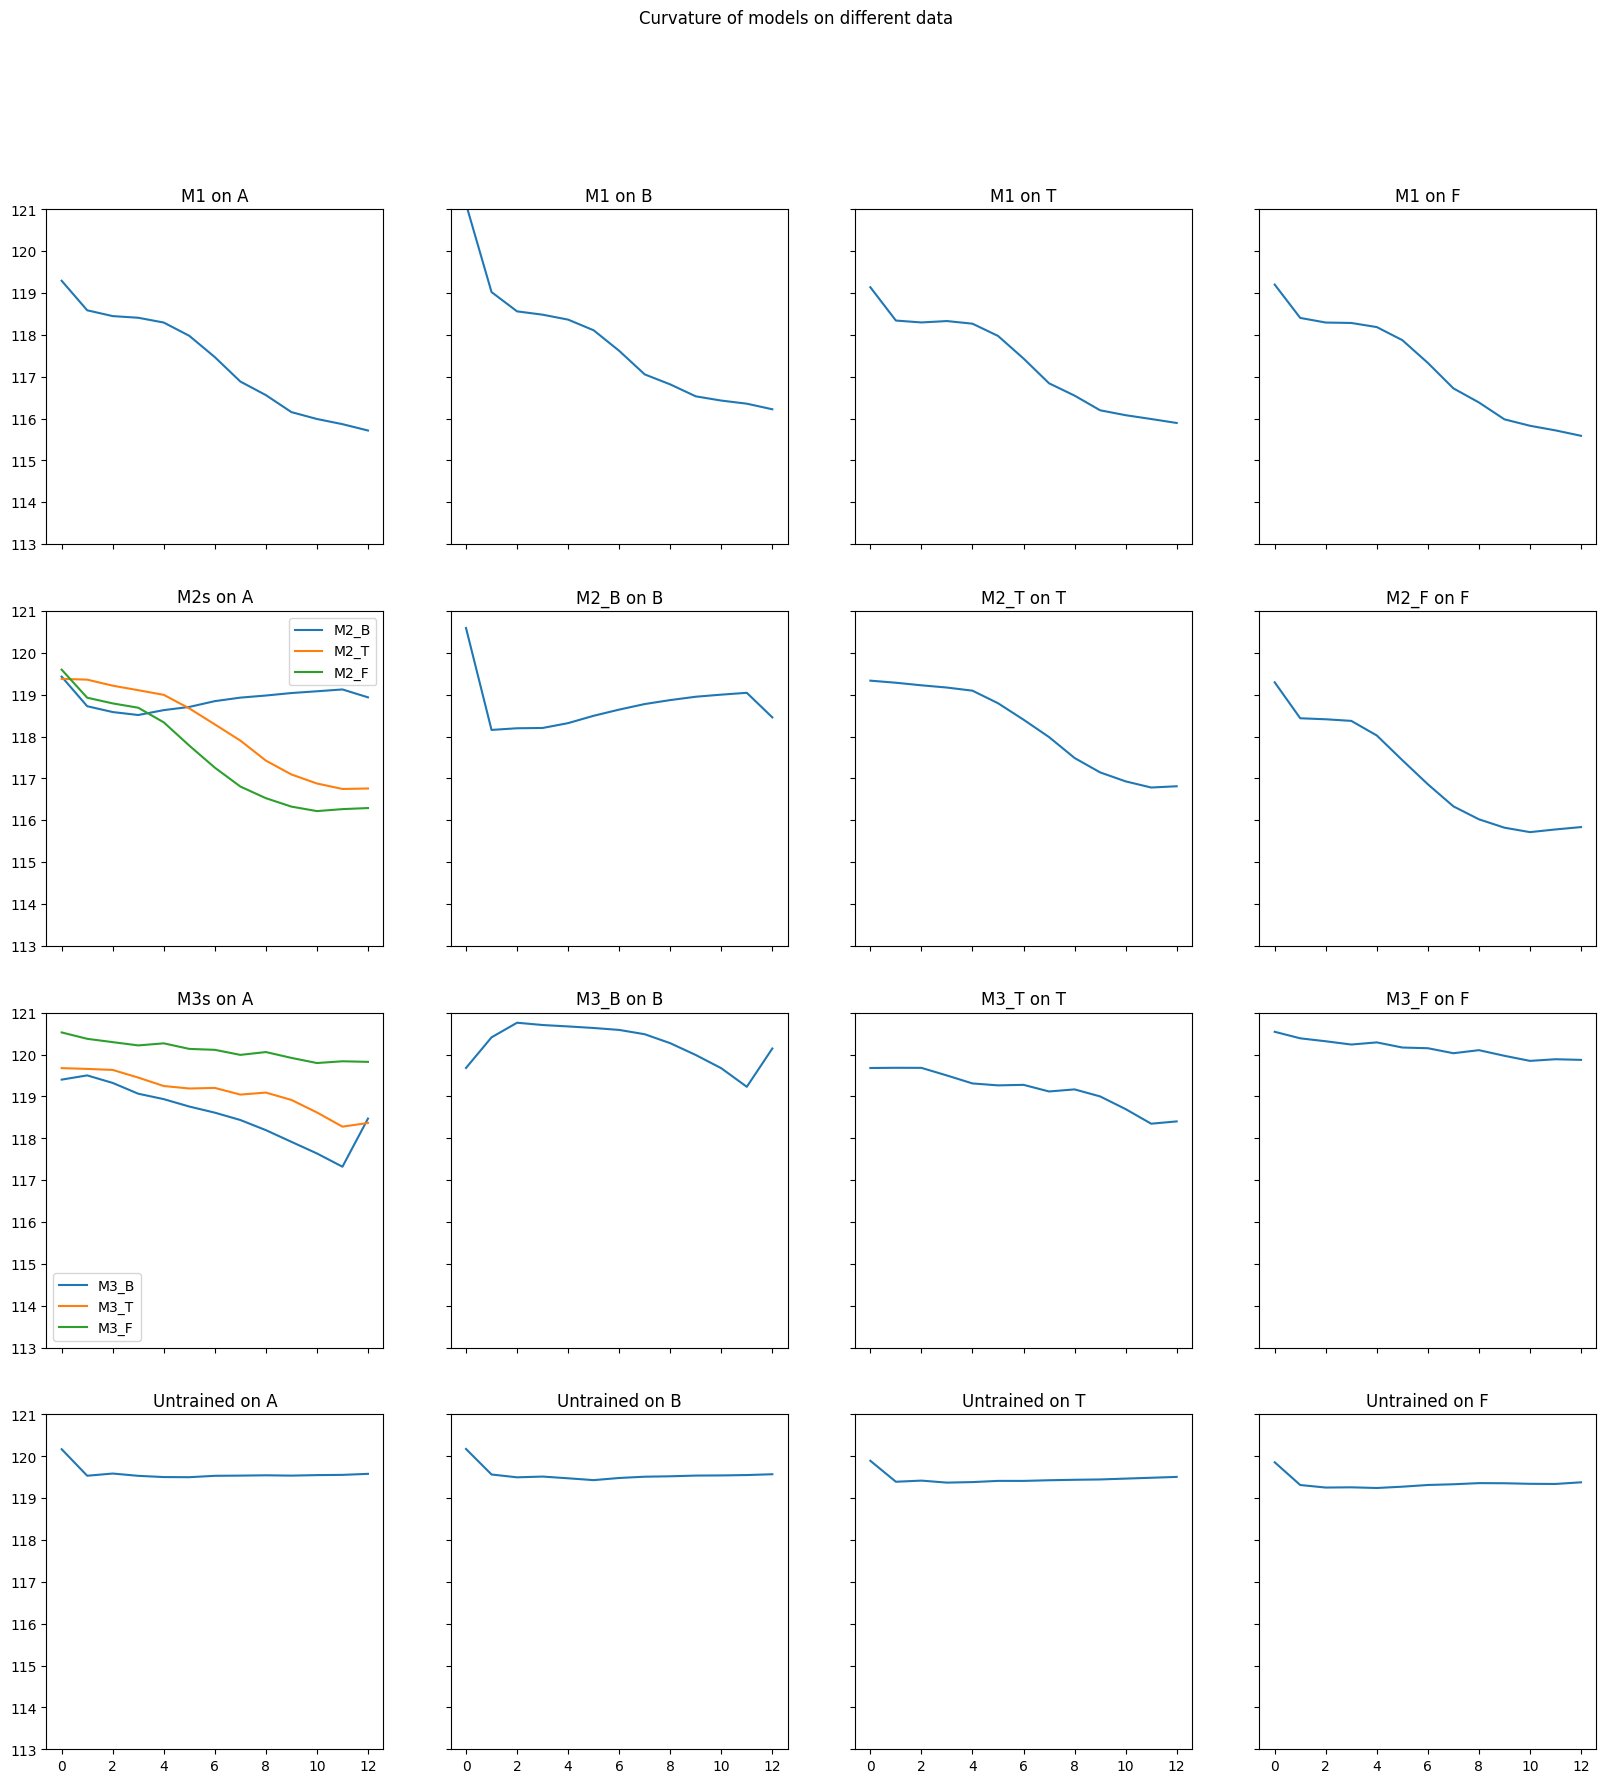

In [22]:
#plot a grid with m1, m2, m3, untrained on y and A, B, T, F on x
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Curvature of models on different data')
axs[0, 0].plot(m1_onA)
axs[0, 0].set_title('M1 on A')
axs[0, 1].plot(m1_onB)
axs[0, 1].set_title('M1 on B')
axs[0, 2].plot(m1_onT)
axs[0, 2].set_title('M1 on T')
axs[0, 3].plot(m1_onF)
axs[0, 3].set_title('M1 on F')

axs[1, 0].plot(m2_B_onA, label="M2_B")
axs[1, 0].plot(m2_T_onA, label="M2_T")
axs[1, 0].plot(m2_F_onA, label="M2_F")
axs[1, 0].set_title('M2s on A')
axs[1, 0].legend()

axs[1, 1].plot(m2_B_onB)
axs[1, 1].set_title('M2_B on B')
axs[1, 2].plot(m2_T_onT)
axs[1, 2].set_title('M2_T on T')
axs[1, 3].plot(m2_F_onF)
axs[1, 3].set_title('M2_F on F')

axs[2, 0].plot(m3_B_onA, label="M3_B")
axs[2, 0].plot(m3_T_onA, label="M3_T")
axs[2, 0].plot(m3_F_onA, label="M3_F")
axs[2, 0].set_title('M3s on A')
axs[2, 0].legend()

axs[2, 1].plot(m3_B_onB)
axs[2, 1].set_title('M3_B on B')
axs[2, 2].plot(m3_T_onT)
axs[2, 2].set_title('M3_T on T')
axs[2, 3].plot(m3_F_onF)
axs[2, 3].set_title('M3_F on F')

axs[3, 0].plot(untrained_onA)
axs[3, 0].set_title('Untrained on A')
axs[3, 1].plot(untrained_onB)
axs[3, 1].set_title('Untrained on B')
axs[3, 2].plot(untrained_onT)
axs[3, 2].set_title('Untrained on T')
axs[3, 3].plot(untrained_onF)
axs[3, 3].set_title('Untrained on F')

#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.show()



## Experiment 1 - Shorter Data

In [ ]:
m1_name = "shorter_data/M1_128_12/easy-meadow-319/final_chkpoint"

m2_B_name = "shorter_data/M2_128_12/wild-sun-300/epoch_60"
m3_B_name = "shorter_data/M3_128_12/deep-firefly-306/epoch_80"

m2_T_name = "shorter_data/M2_T_128_12/hearty-wind-301/epoch_80"
m3_T_name = "shorter_data/M3_T_128_12/zany-surf-316/epoch_14"

m2_F_name = "shorter_data/M2_F_128_12/zesty-river-302/epoch_80"
m3_F_name = "shorter_data/M3_F_128_12/summer-music-317/final_chkpoint"

m1_onA = get_curvature(m1_name, val_data_A)
m2_B_onA = get_curvature(m2_B_name, val_data_A)
m3_B_onA = get_curvature(m3_B_name, val_data_A)
m2_T_onA = get_curvature(m2_T_name, val_data_A)
m3_T_onA = get_curvature(m3_T_name, val_data_A)
m2_F_onA = get_curvature(m2_F_name, val_data_A)
m3_F_onA = get_curvature(m3_F_name, val_data_A)
untrained_onA = get_curvature("untrained", val_data_A)

m1_onB = get_curvature(m1_name, val_data_B)
m2_B_onB = get_curvature(m2_B_name, val_data_B)
m3_B_onB = get_curvature(m3_B_name, val_data_B)
untrained_onB = get_curvature("untrained", val_data_B)

m1_onT = get_curvature(m1_name, val_data_T)
m2_T_onT = get_curvature(m2_T_name, val_data_T)
m3_T_onT = get_curvature(m3_T_name, val_data_T)
untrained_onT = get_curvature("untrained", val_data_T)

m1_onF = get_curvature(m1_name, val_data_F)
m2_F_onF = get_curvature(m2_F_name, val_data_F)
m3_F_onF = get_curvature(m3_F_name, val_data_F)
untrained_onF = get_curvature("untrained", val_data_F)

#save
curvatures = {
    "m1_onA": m1_onA,
    "m2_B_onA": m2_B_onA,
    "m3_B_onA": m3_B_onA,
    "m2_T_onA": m2_T_onA,
    "m3_T_onA": m3_T_onA,
    "m2_F_onA": m2_F_onA,
    "m3_F_onA": m3_F_onA,
    "untrained_onA": untrained_onA,
    "m1_onB": m1_onB,
    "m2_B_onB": m2_B_onB,
    "m3_B_onB": m3_B_onB,
    "untrained_onB": untrained_onB,
    "m1_onT": m1_onT,
    "m2_T_onT": m2_T_onT,
    "m3_T_onT": m3_T_onT,
    "untrained_onT": untrained_onT,
    "m1_onF": m1_onF,
    "m2_F_onF": m2_F_onF,
    "m3_F_onF": m3_F_onF,
    "untrained_onF": untrained_onF,
}

with open(f"{path}/shorter_data/curvatures.pkl", "wb") as f:
    pickle.dump(curvatures, f)

In [25]:
curvatures = pickle.load(open(f"{path}/shorter_data/curvatures.pkl", "rb"))
m1_onA = curvatures["m1_onA"]
m2_B_onA = curvatures["m2_B_onA"]
m3_B_onA = curvatures["m3_B_onA"]
m2_T_onA = curvatures["m2_T_onA"]
m3_T_onA = curvatures["m3_T_onA"]
m2_F_onA = curvatures["m2_F_onA"]
m3_F_onA = curvatures["m3_F_onA"]
untrained_onA = curvatures["untrained_onA"]
m1_onB = curvatures["m1_onB"]
m2_B_onB = curvatures["m2_B_onB"]
m3_B_onB = curvatures["m3_B_onB"]
untrained_onB = curvatures["untrained_onB"]
m1_onT = curvatures["m1_onT"]
m2_T_onT = curvatures["m2_T_onT"]
m3_T_onT = curvatures["m3_T_onT"]
untrained_onT = curvatures["untrained_onT"]
m1_onF = curvatures["m1_onF"]
m2_F_onF = curvatures["m2_F_onF"]
m3_F_onF = curvatures["m3_F_onF"]
untrained_onF = curvatures["untrained_onF"]

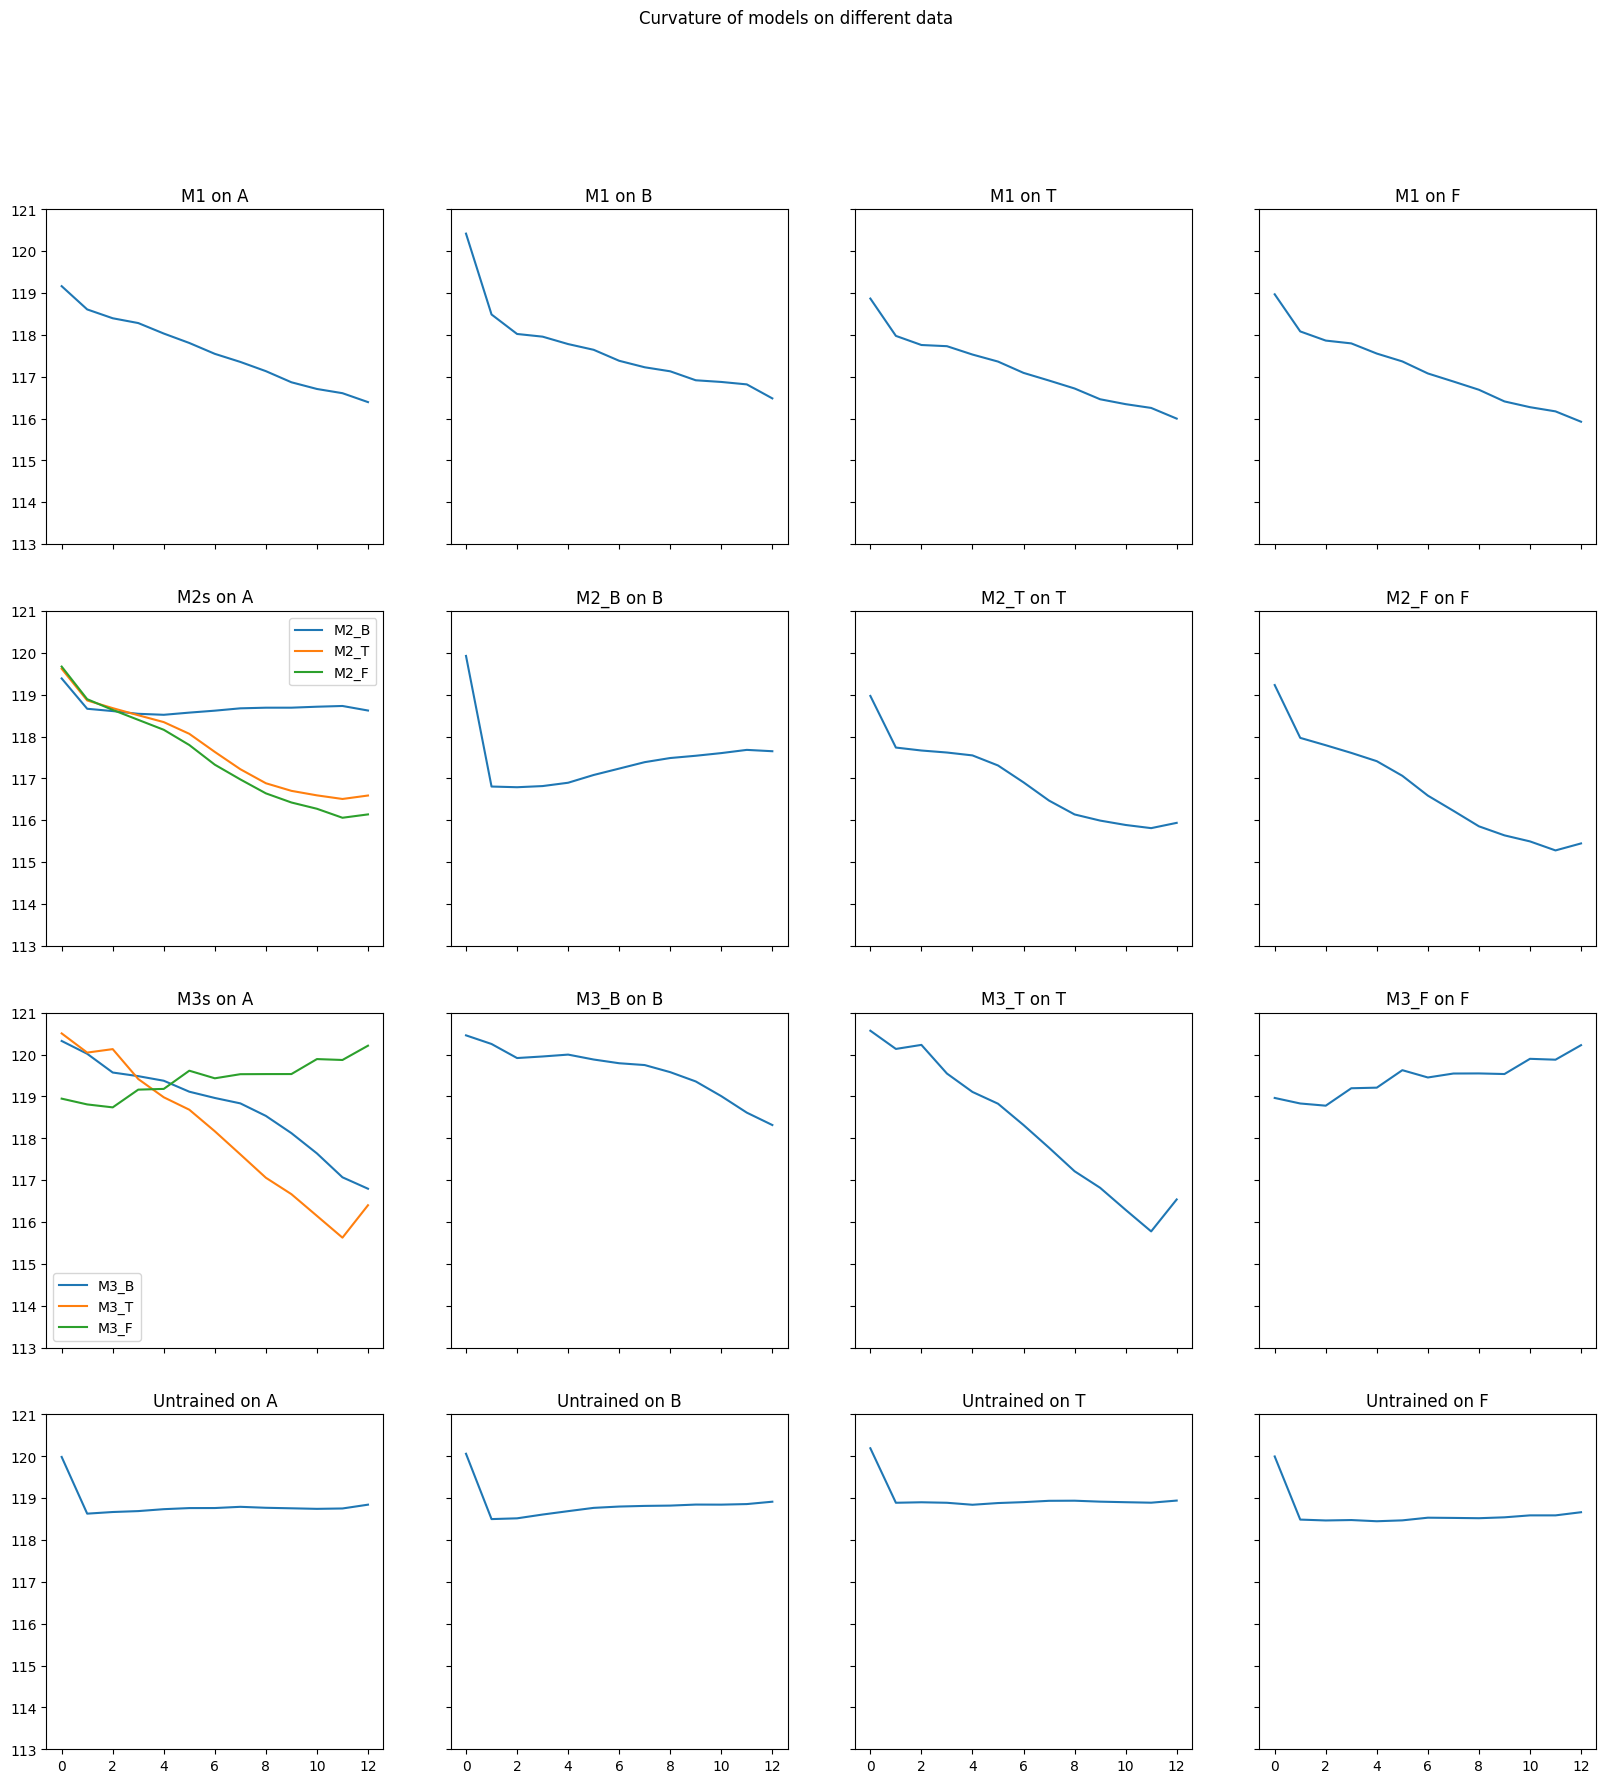

In [26]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Curvature of models on different data')
axs[0, 0].plot(m1_onA)
axs[0, 0].set_title('M1 on A')
axs[0, 1].plot(m1_onB)
axs[0, 1].set_title('M1 on B')
axs[0, 2].plot(m1_onT)
axs[0, 2].set_title('M1 on T')
axs[0, 3].plot(m1_onF)
axs[0, 3].set_title('M1 on F')

axs[1, 0].plot(m2_B_onA, label="M2_B")
axs[1, 0].plot(m2_T_onA, label="M2_T")
axs[1, 0].plot(m2_F_onA, label="M2_F")
axs[1, 0].set_title('M2s on A')
axs[1, 0].legend()

axs[1, 1].plot(m2_B_onB)
axs[1, 1].set_title('M2_B on B')
axs[1, 2].plot(m2_T_onT)
axs[1, 2].set_title('M2_T on T')
axs[1, 3].plot(m2_F_onF)
axs[1, 3].set_title('M2_F on F')

axs[2, 0].plot(m3_B_onA, label="M3_B")
axs[2, 0].plot(m3_T_onA, label="M3_T")
axs[2, 0].plot(m3_F_onA, label="M3_F")
axs[2, 0].set_title('M3s on A')
axs[2, 0].legend()

axs[2, 1].plot(m3_B_onB)
axs[2, 1].set_title('M3_B on B')
axs[2, 2].plot(m3_T_onT)
axs[2, 2].set_title('M3_T on T')
axs[2, 3].plot(m3_F_onF)
axs[2, 3].set_title('M3_F on F')

axs[3, 0].plot(untrained_onA)
axs[3, 0].set_title('Untrained on A')
axs[3, 1].plot(untrained_onB)
axs[3, 1].set_title('Untrained on B')
axs[3, 2].plot(untrained_onT)
axs[3, 2].set_title('Untrained on T')
axs[3, 3].plot(untrained_onF)
axs[3, 3].set_title('Untrained on F')

#set y axis bounds for all plots
for ax in axs.flat:
    ax.set_ylim(113, 121)
    ax.label_outer()

plt.show()

